In [2]:
import pandas as pd
import obonet
import networkx as nx

from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

import helper as helper

In [3]:
mouse_pheno = pd.read_csv('./results/mouse_pheno/p0_fixed_seed.csv', sep=',', index_col=0)

In [4]:
omim_terms = list(mouse_pheno.index)
omim_term2name = helper.term2name('./data/gmt/omim.20231030.gmt')
obo_graph = obonet.read_obo('./data/ontology/doid.obo')
omim_graph = nx.DiGraph()
for x,y in obo_graph.edges():
    omim_graph.add_edge(y, x)
    
for term, name in obo_graph.nodes(data='name'):
    omim_term2name[term] = name
ordered_omim_nodes = list(nx.dfs_preorder_nodes(omim_graph, 'DOID:4'))
ordered_omim_terms = [x for x in ordered_omim_nodes if x in omim_terms]
print(len(ordered_omim_terms), len(omim_terms))
omim_indices = [omim_terms.index(x) for x in ordered_omim_terms]
ordered_omim_names = [omim_term2name[x] for x in ordered_omim_terms]

omim_name2term = dict()
for key, value in omim_term2name.items():
    omim_name2term[value]=key

277 277


In [5]:
mmu_terms = list(mouse_pheno.columns)
mmu_term2name = helper.term2name('./data/gmt/mouse_pheno.202203.gmt')
obo_graph = obonet.read_obo('./data/ontology/MPheno_OBO.ontology')
mmu_graph = nx.DiGraph()
for x,y in obo_graph.edges():
    mmu_graph.add_edge(y, x)

for term, name in obo_graph.nodes(data='name'):
    mmu_term2name[term] = name
ordered_mmu_nodes = list(nx.dfs_preorder_nodes(mmu_graph, 'MP:0000001'))
ordered_mmu_terms = [x for x in ordered_mmu_nodes if x in mmu_terms]
print(len(ordered_mmu_terms), len(mmu_terms))
mmu_indices = [mmu_terms.index(x) for x in ordered_mmu_terms]
ordered_mmu_names = [mmu_term2name[x] for x in ordered_mmu_terms]

mmu_name2term = dict()
for key, value in mmu_term2name.items():
    mmu_name2term[value]=key

3738 3738


In [6]:
disease_slim_term = []
with open('./data/drug_info/DO_slim.txt', 'r') as f:
    for line in f:
        tokens = line.split('\t')
        disease_slim_term.append(tokens[0])

In [7]:
omim2slim = defaultdict(list)
omim_slim2terms = defaultdict(list)
omim_slim_terms = set()
for x in ordered_omim_terms:
    paths = helper.paths_to_root(omim_graph, x, 'DOID:4')
    mapped_slim = set()
    for p in paths:
        mapped_slim = mapped_slim.union(set(disease_slim_term).intersection(p))
        
    if len(mapped_slim) == 0:
        mapped_slim = set([y[3] for y in helper.paths_to_root(omim_graph, x, 'DOID:4') if len(y)>3])
        
    omim_slim_terms = omim_slim_terms.union(mapped_slim)
    if len(mapped_slim)>0:
        omim2slim[x] = list(mapped_slim)
    for y in mapped_slim:
        omim_slim2terms[y].append(x)

DOID:374 nutrition disease
DOID:9970 obesity
DOID:2978 carbohydrate metabolic disorder
(7, 32)
Bbox(x0=0.17403888888888894, y0=0.8983, x1=0.839638888888889, y1=0.985)
Bbox(x0=0.17403888888888894, y0=0.8983, x1=0.839638888888889, y1=0.985)


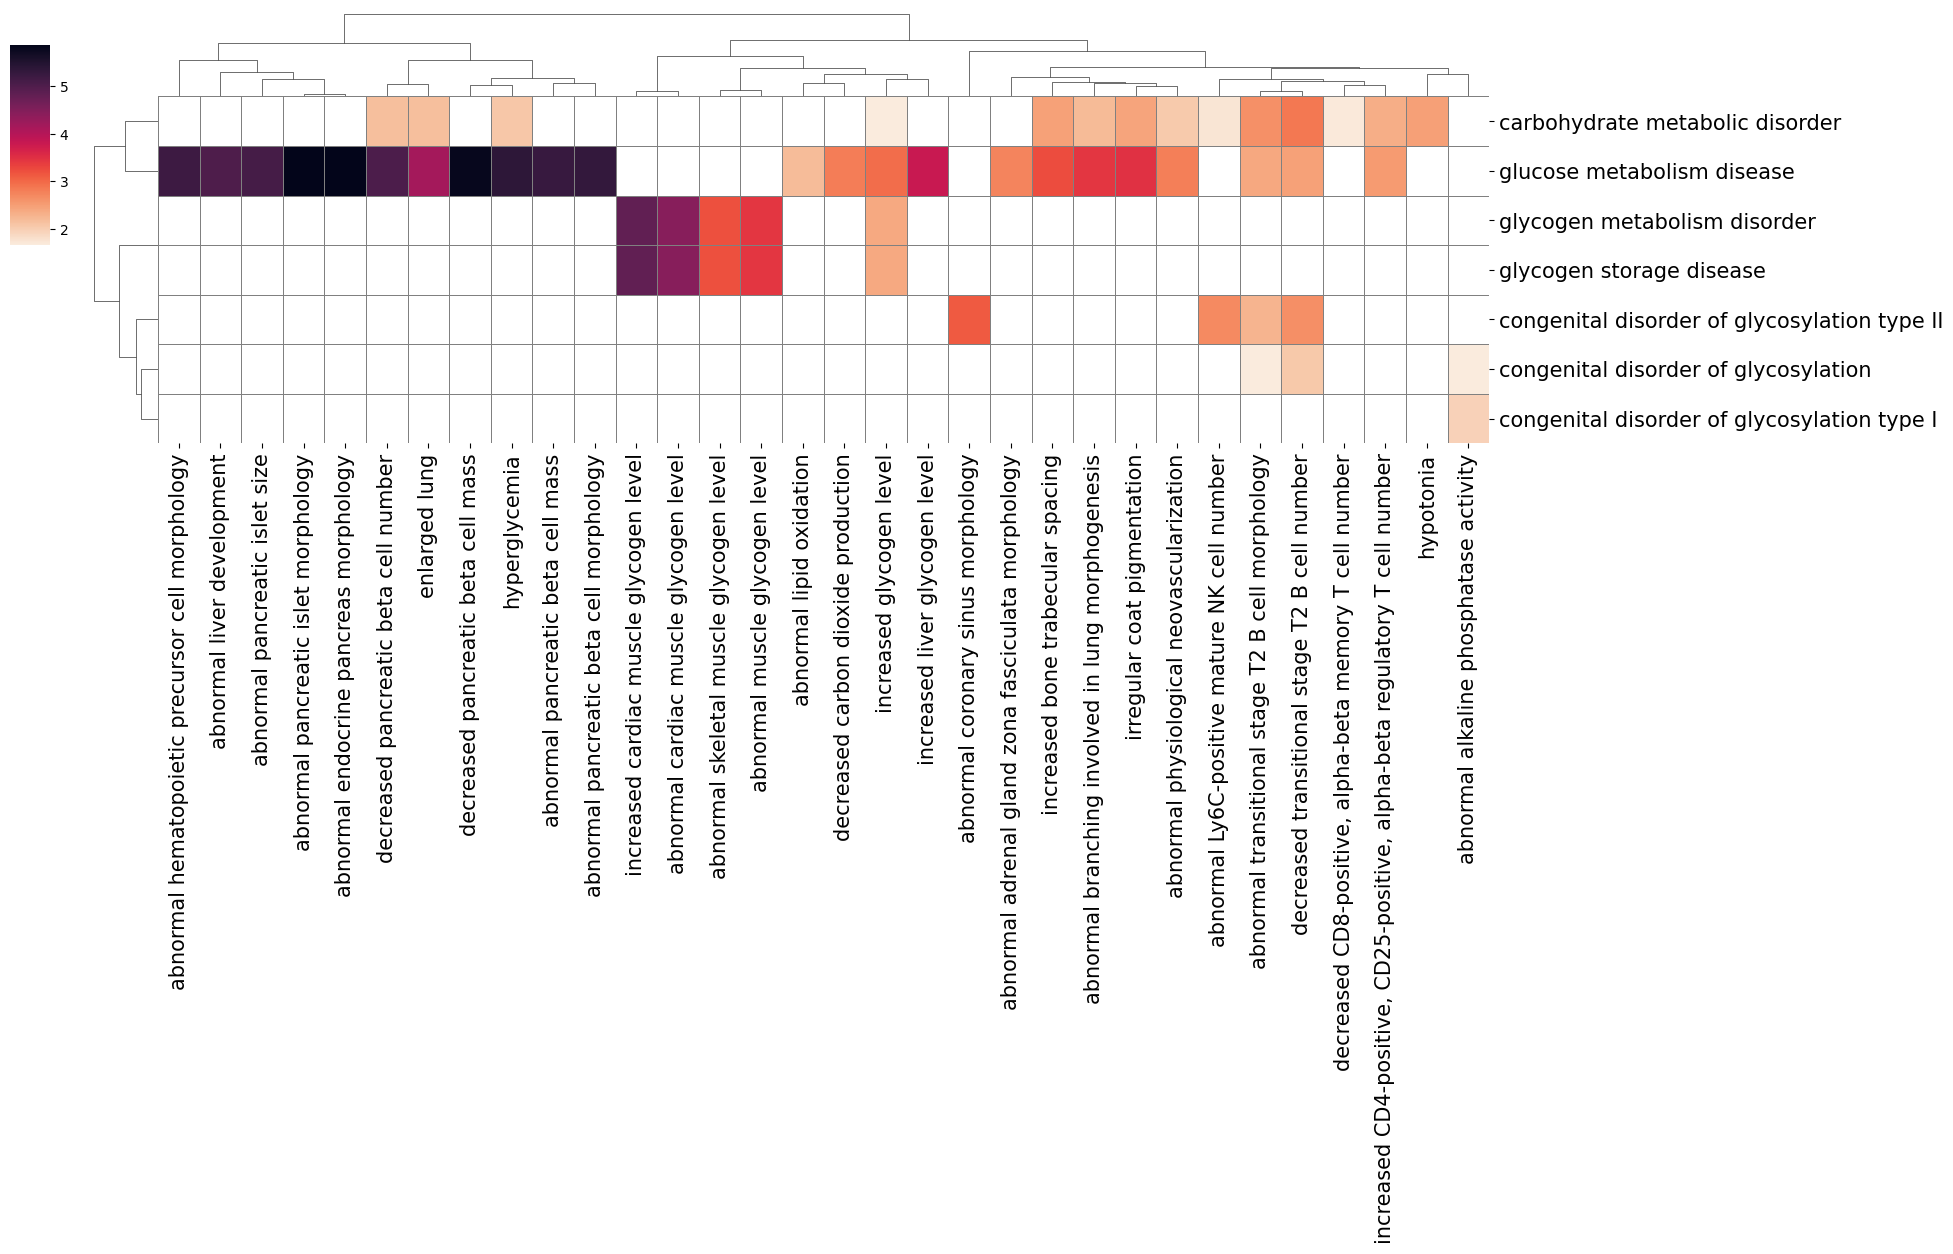

DOID:9351 diabetes mellitus
DOID:0050570 congenital disorder of glycosylation type I
DOID:0050571 congenital disorder of glycosylation type II
DOID:3146 lipid metabolism disorder
DOID:3211 lysosomal storage disease
(5, 27)
Bbox(x0=0.18306388888888891, y0=0.8609, x1=0.884763888888889, y1=0.985)
Bbox(x0=0.18306388888888891, y0=0.8609, x1=0.884763888888889, y1=0.985)


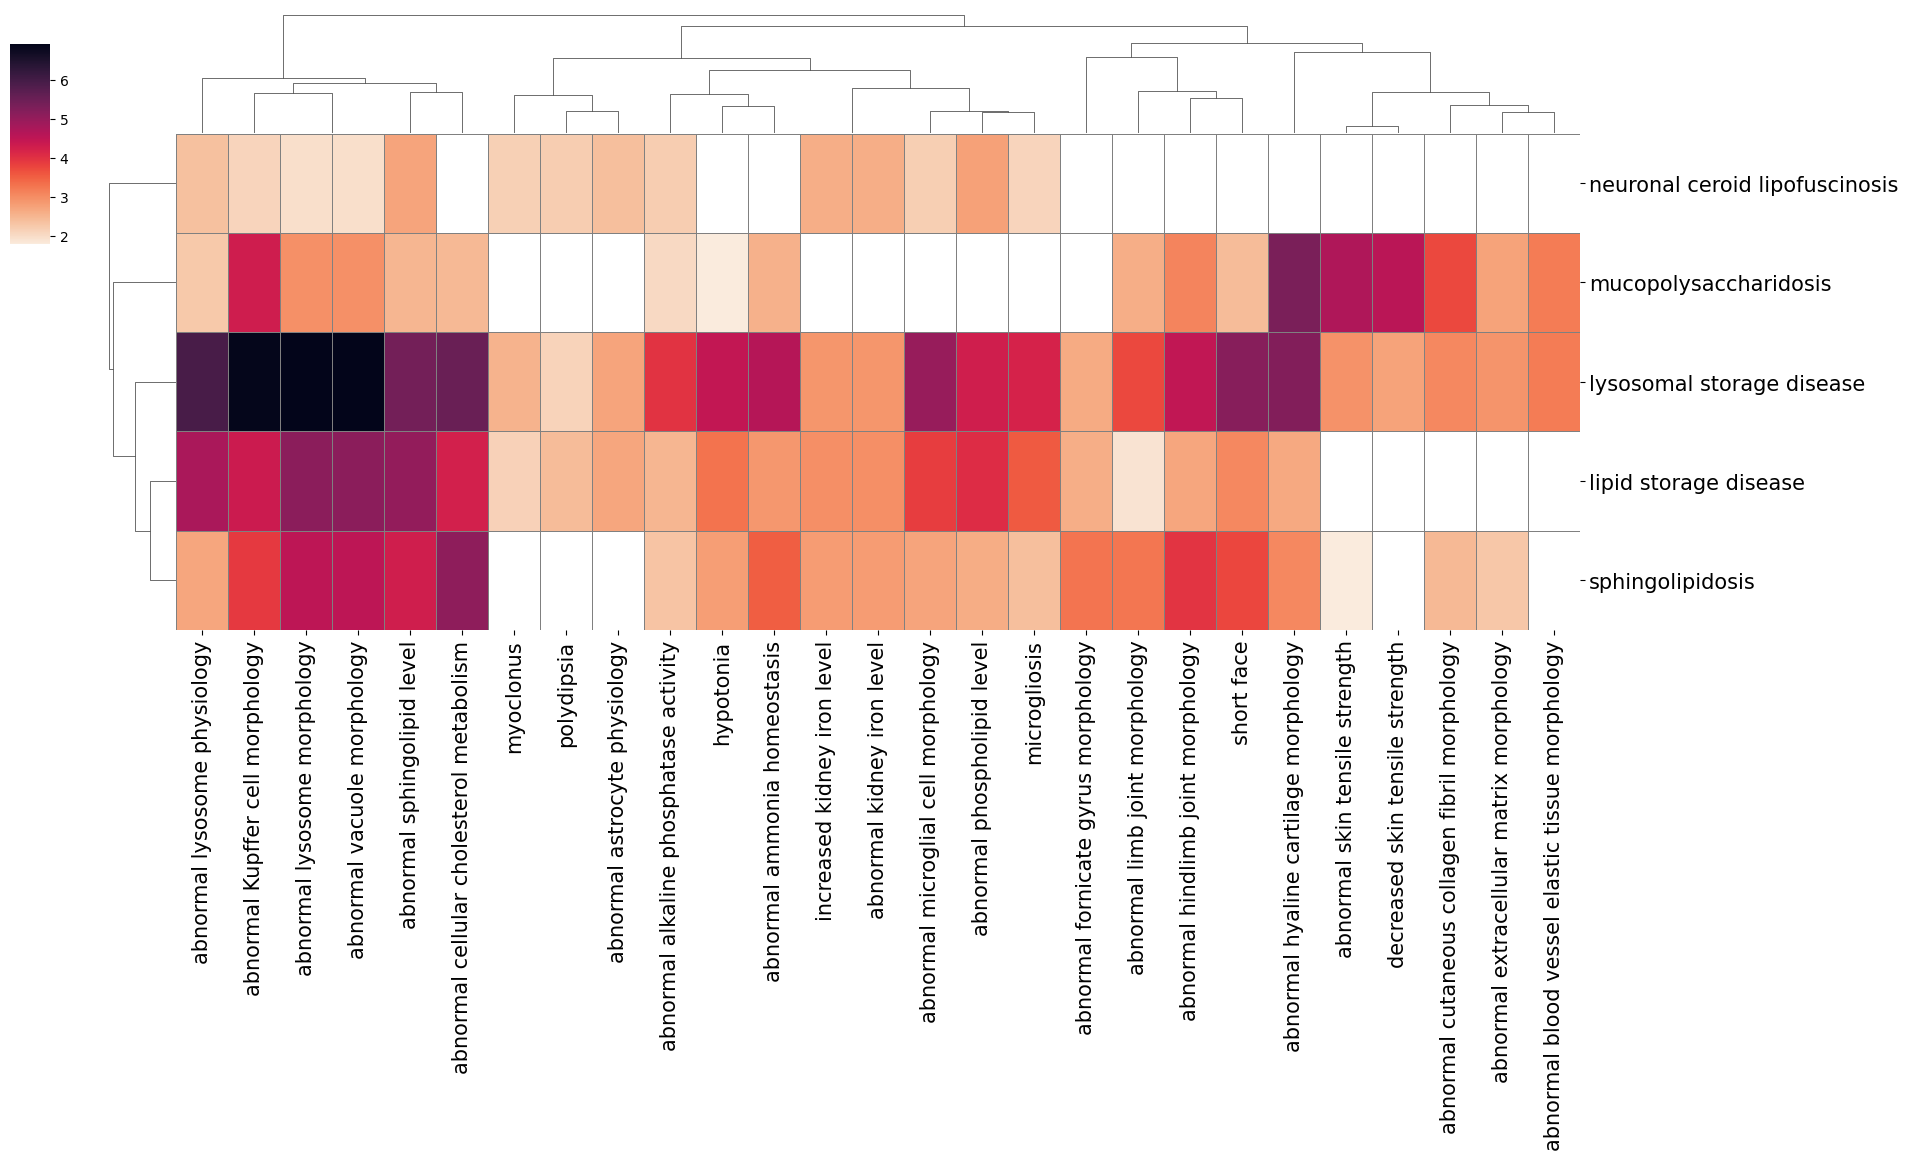

DOID:700 mitochondrial metabolism disease
(5, 23)
Bbox(x0=0.17017638888888892, y0=0.883975, x1=0.820326388888889, y1=0.985)
Bbox(x0=0.17017638888888892, y0=0.883975, x1=0.820326388888889, y1=0.985)


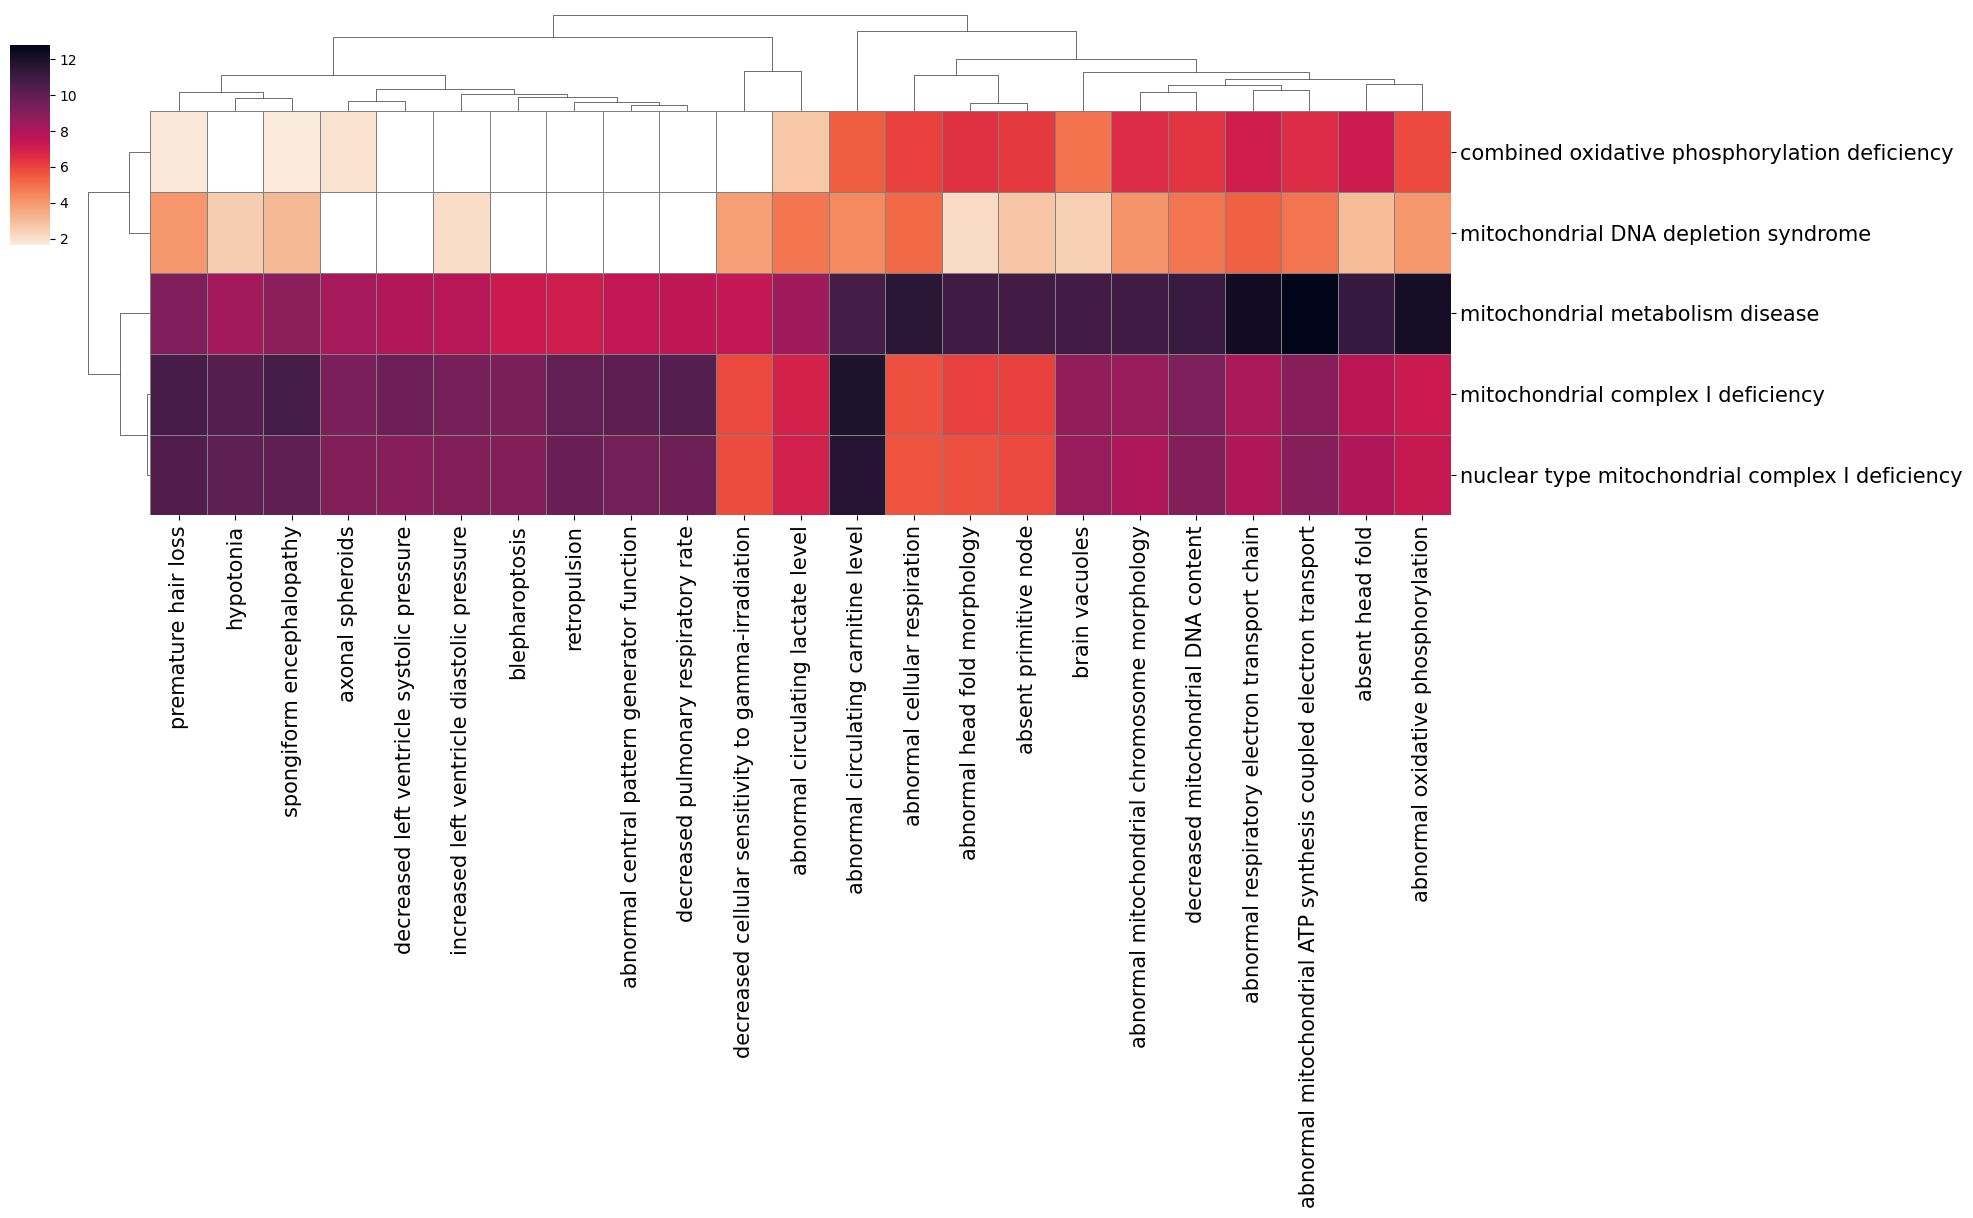

DOID:896 metal metabolism disorder
DOID:906 peroxisomal disease
DOID:9252 amino acid metabolic disorder
DOID:2490 congenital nervous system abnormality
(5, 29)
Bbox(x0=0.17371388888888895, y0=0.8666, x1=0.8380138888888892, y1=0.985)
Bbox(x0=0.17371388888888895, y0=0.8666, x1=0.8380138888888892, y1=0.985)


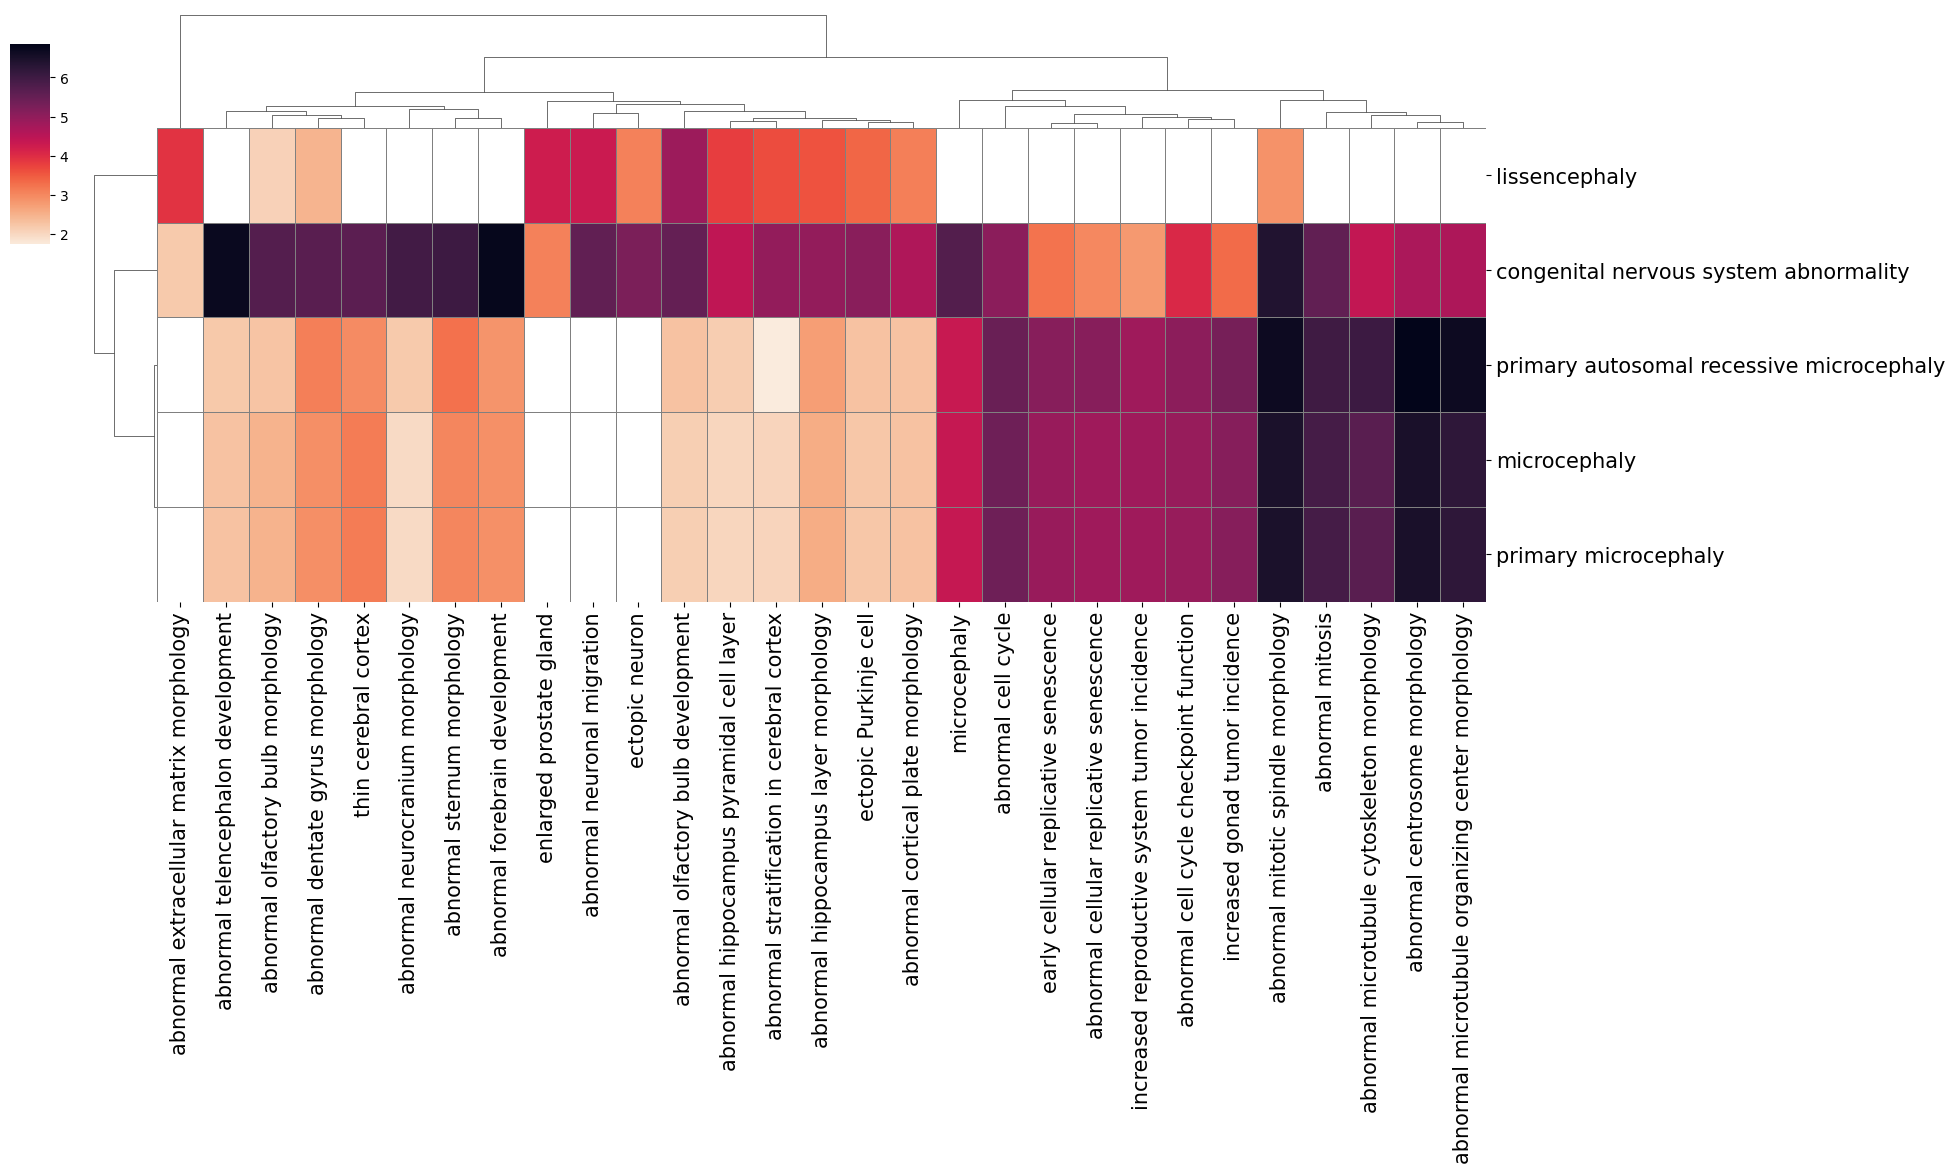

DOID:0050453 lissencephaly
DOID:10907 microcephaly
DOID:0060084 cell type benign neoplasm
DOID:0060085 organ system benign neoplasm
DOID:0050686 organ system cancer
(7, 55)
Bbox(x0=0.1819013888888889, y0=0.86975, x1=0.8789513888888889, y1=0.985)
Bbox(x0=0.1819013888888889, y0=0.86975, x1=0.8789513888888889, y1=0.985)


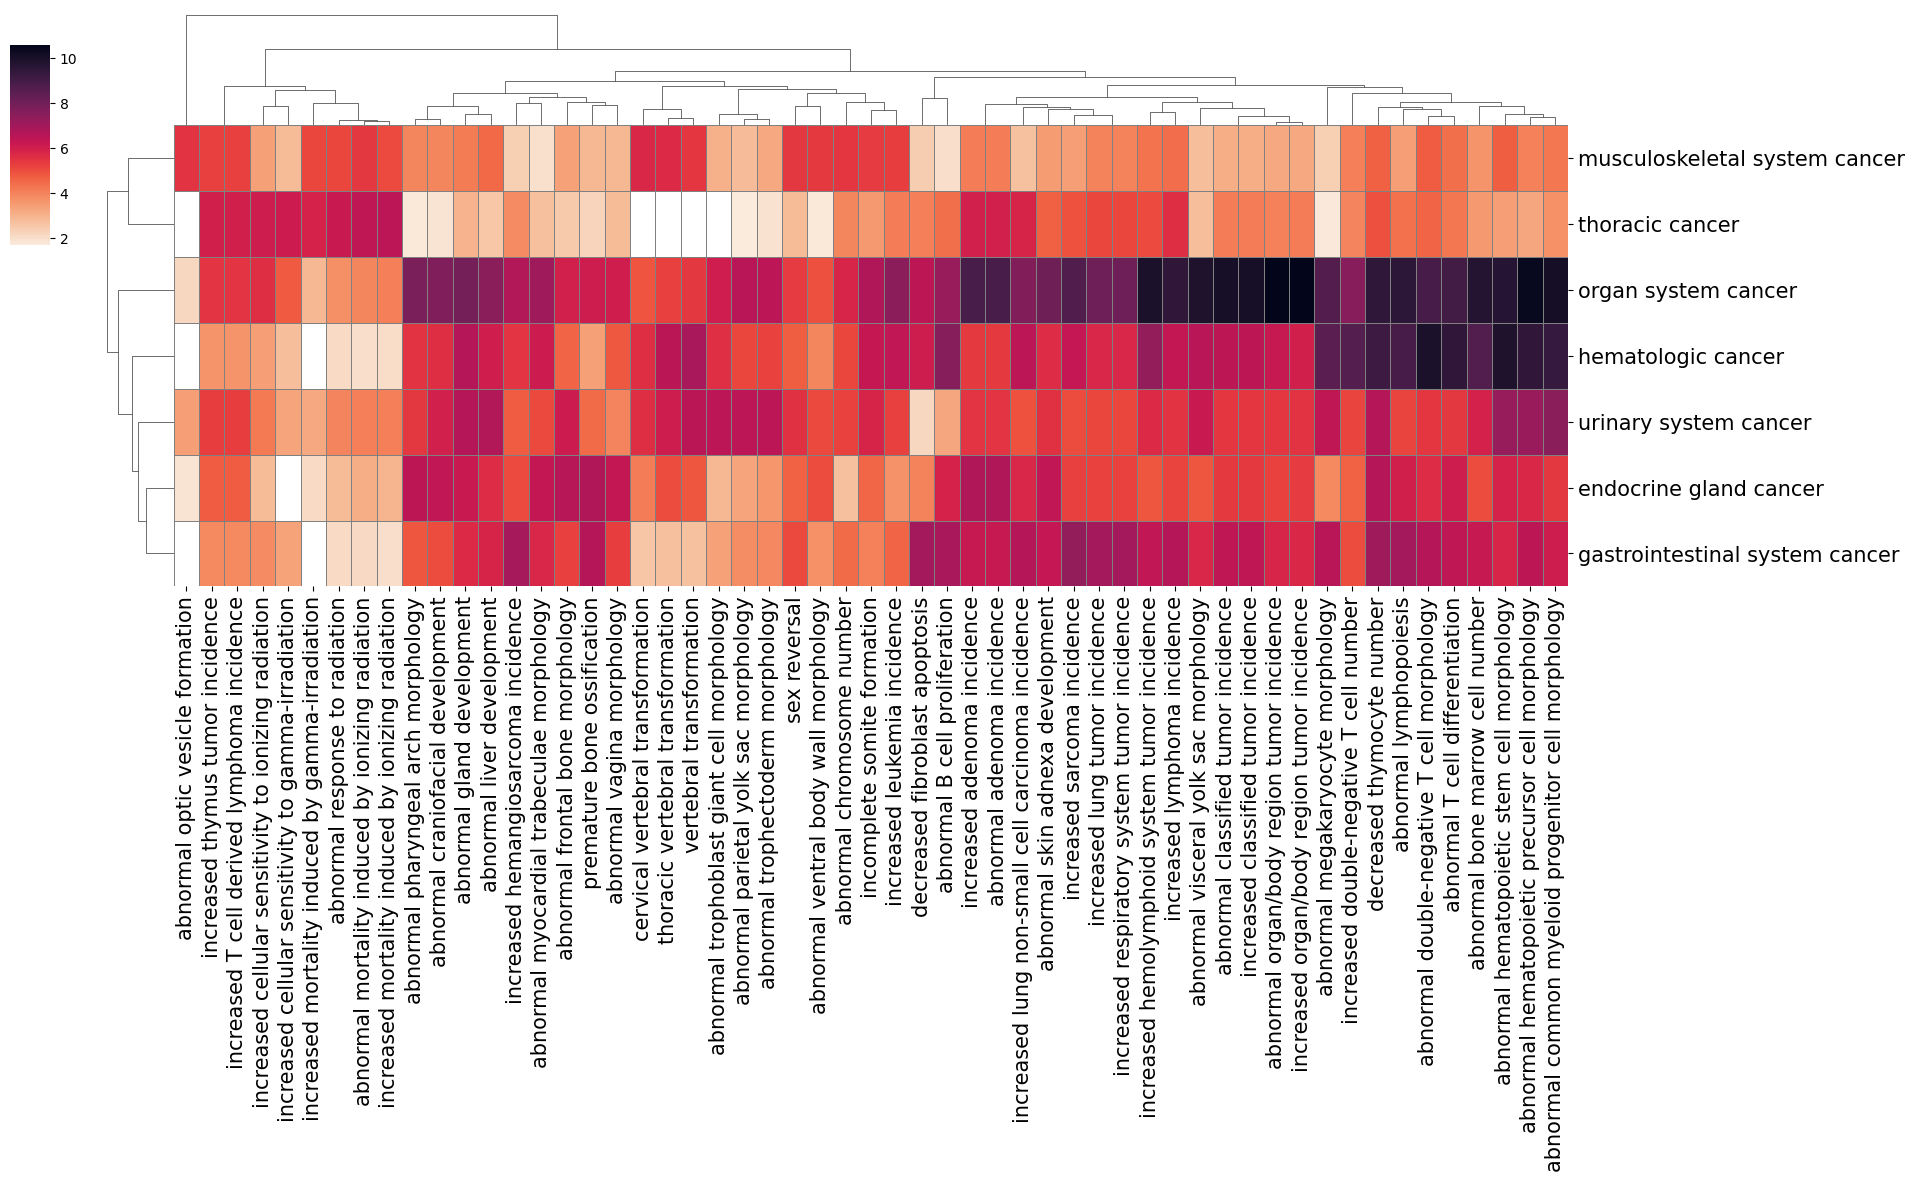

DOID:0060100 musculoskeletal system cancer
DOID:2531 hematologic cancer
DOID:1240 leukemia
DOID:4960 bone marrow cancer
DOID:3119 gastrointestinal system cancer
DOID:10155 intestinal cancer
DOID:10534 stomach cancer
DOID:3996 urinary system cancer
DOID:263 kidney cancer
DOID:5093 thoracic cancer
DOID:1612 breast cancer
DOID:0050687 cell type cancer
DOID:0060038 specific developmental disorder
(9, 56)
Bbox(x0=0.16411388888888892, y0=0.91365, x1=0.790013888888889, y1=0.985)
Bbox(x0=0.16411388888888892, y0=0.91365, x1=0.790013888888889, y1=0.985)


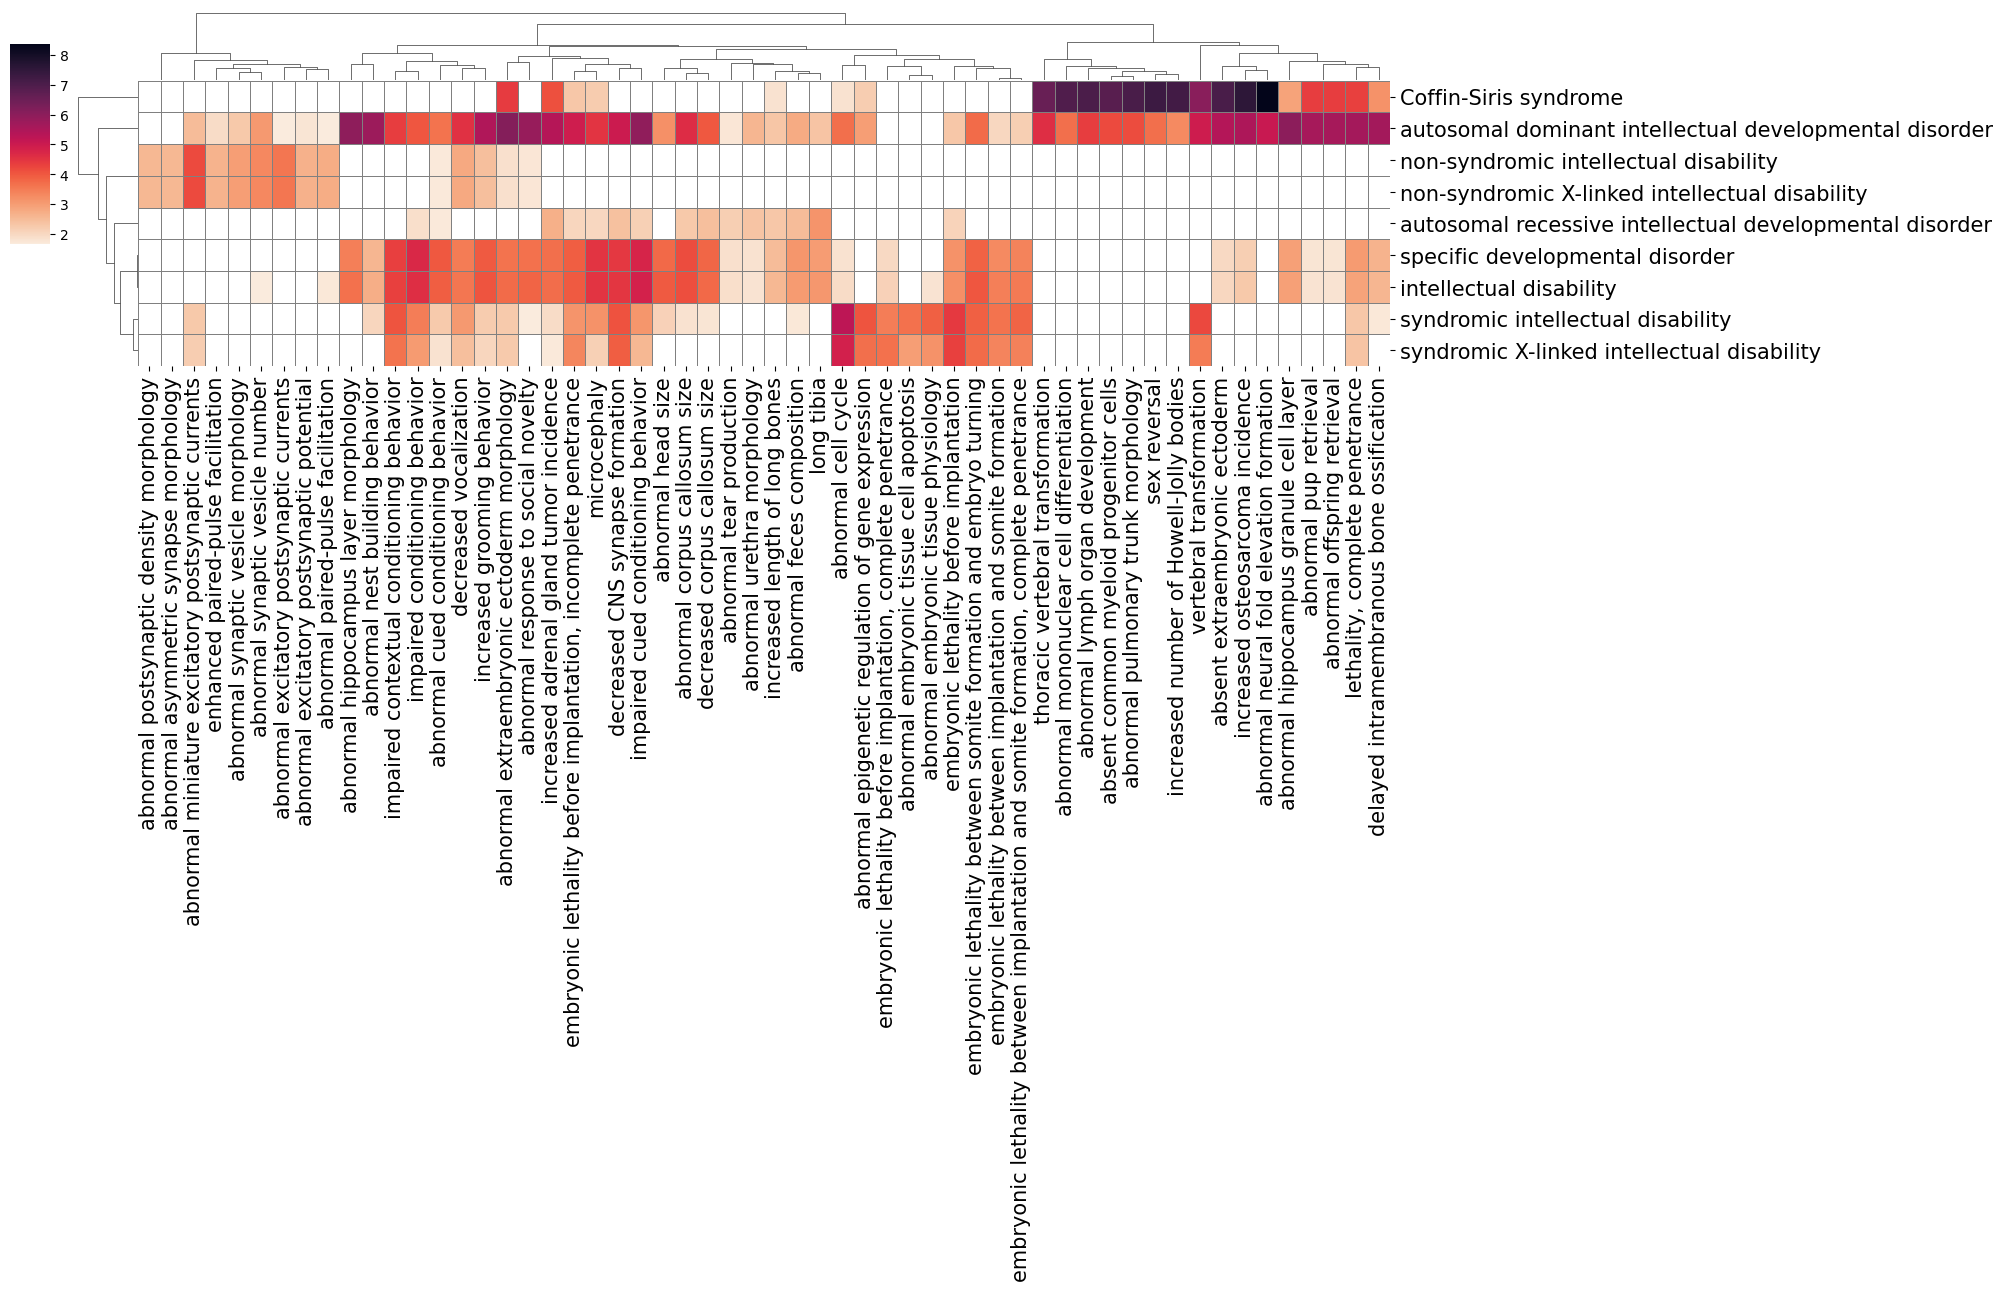

DOID:2468 psychotic disorder
DOID:5419 schizophrenia
DOID:0060340 ciliopathy
DOID:0050777 Joubert syndrome
DOID:9562 primary ciliary dyskinesia
DOID:3490 Noonan syndrome
DOID:1935 Bardet-Biedl syndrome
DOID:0050572 cone-rod dystrophy
DOID:0050735 X-linked monogenic disease
(5, 43)
Bbox(x0=0.17252638888888888, y0=0.91365, x1=0.8320763888888888, y1=0.985)
Bbox(x0=0.17252638888888888, y0=0.91365, x1=0.8320763888888888, y1=0.985)


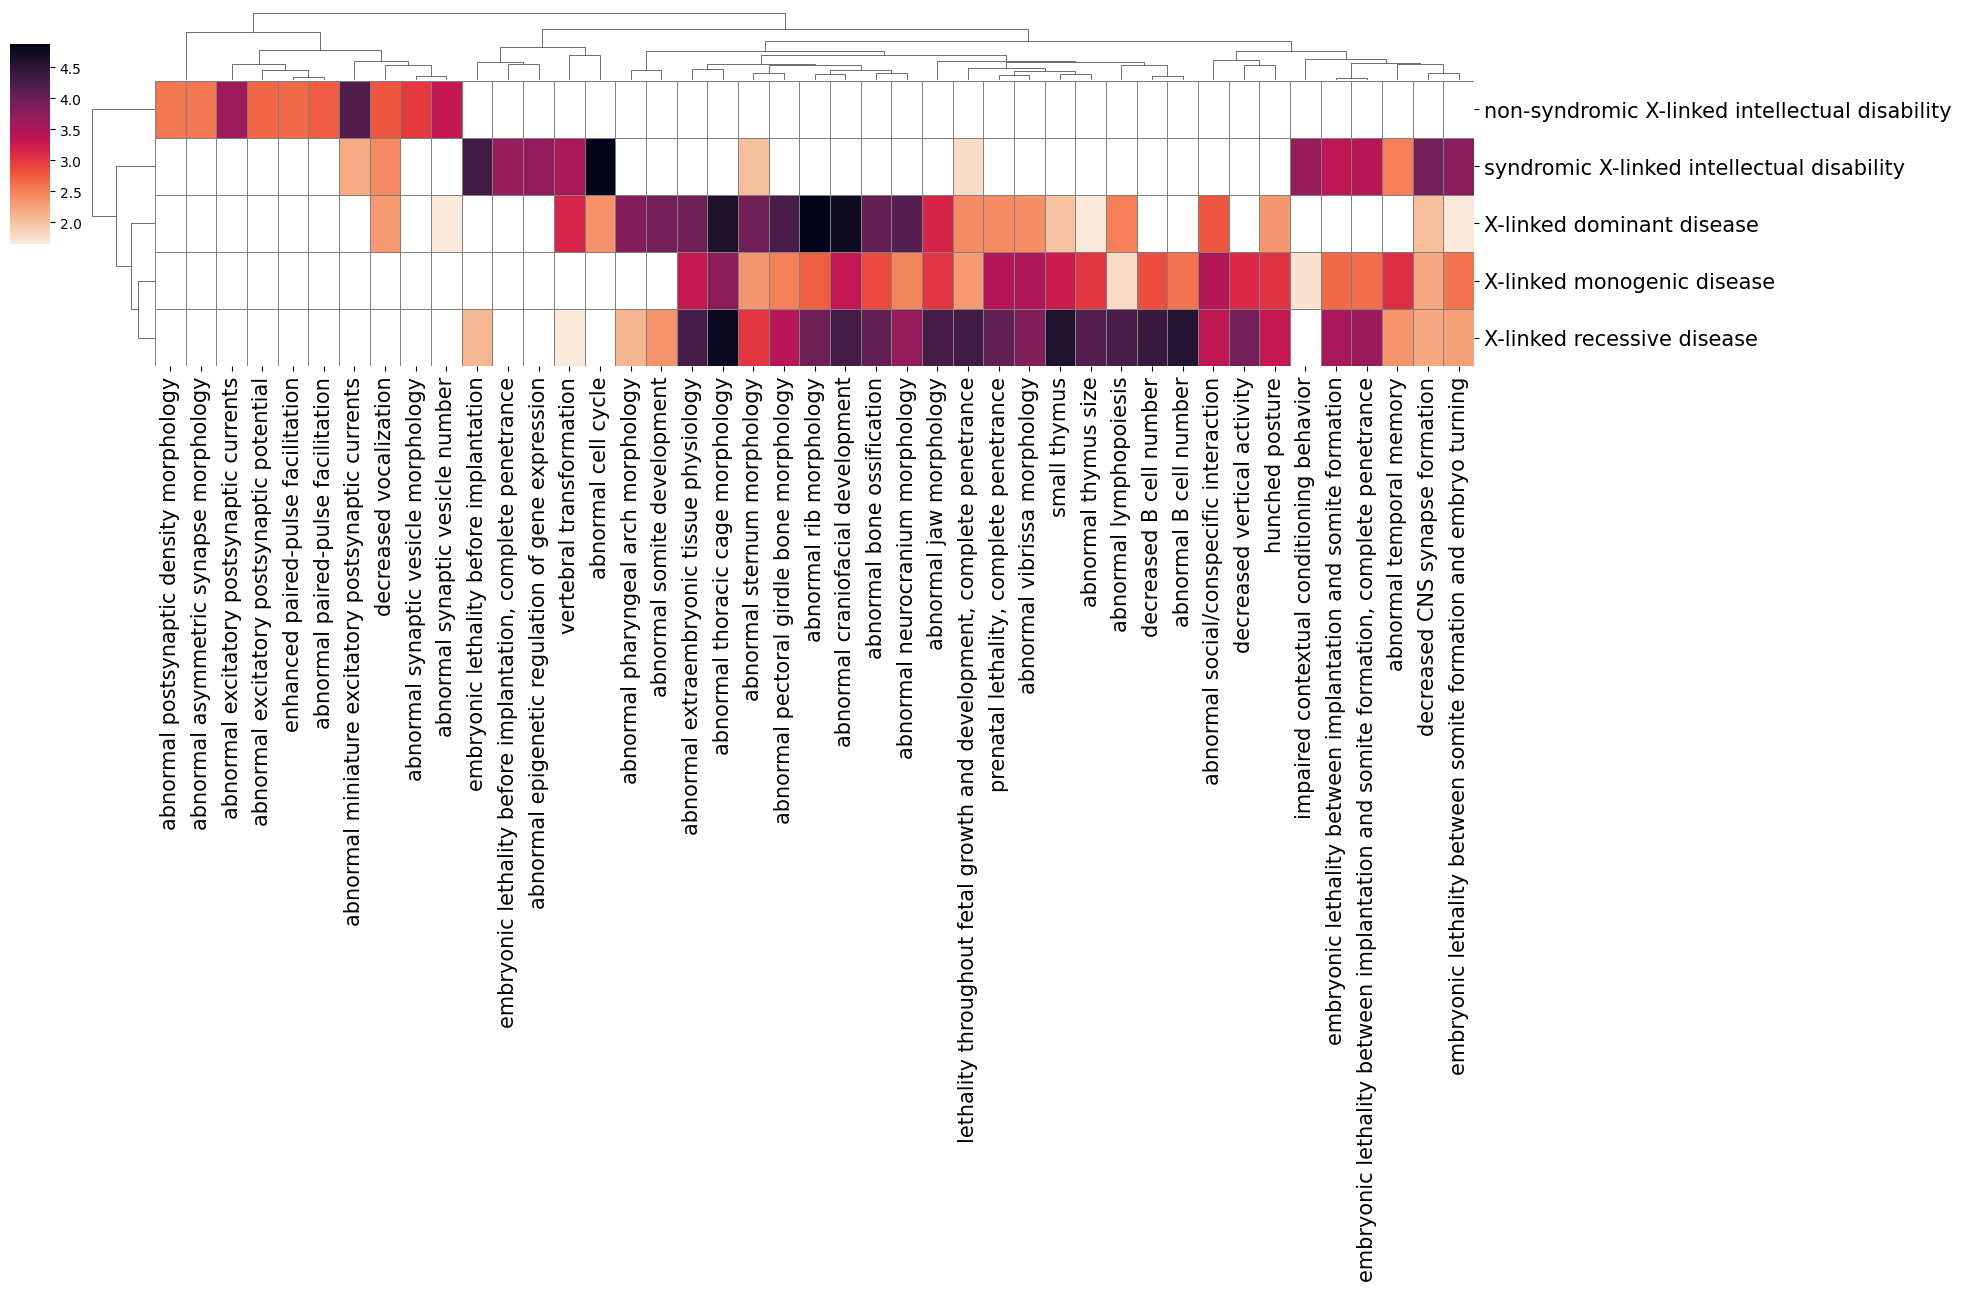

DOID:0050739 autosomal genetic disease
(8, 73)
Bbox(x0=0.16411388888888892, y0=0.8803749999999999, x1=0.790013888888889, y1=0.985)
Bbox(x0=0.16411388888888892, y0=0.8803749999999999, x1=0.790013888888889, y1=0.985)


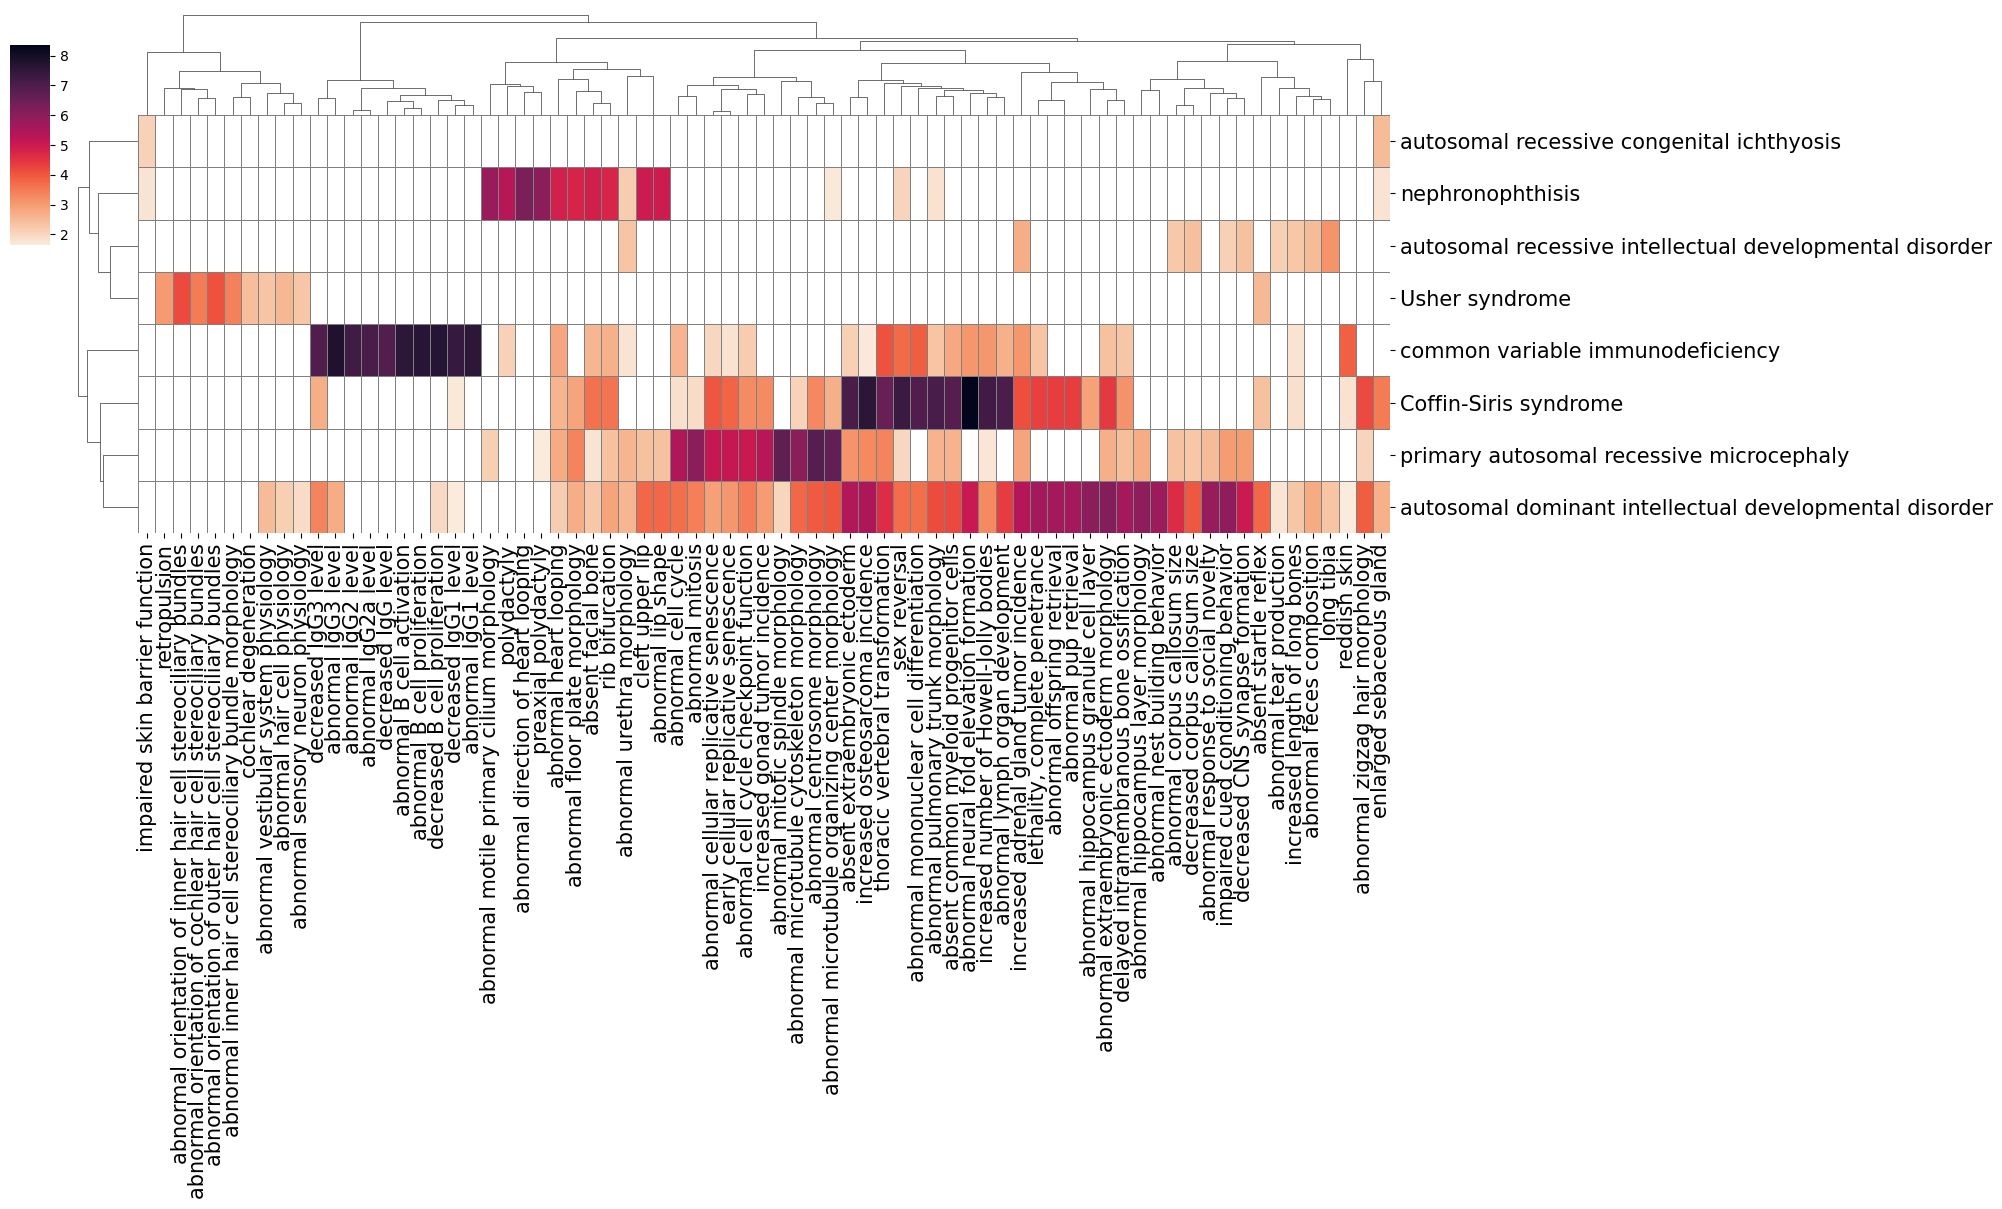

DOID:2590 familial nephrotic syndrome
DOID:83 cataract
DOID:0060388 chromosomal deletion syndrome
DOID:0080578 digenic disease
DOID:3463 breast disease
DOID:114 heart disease
(9, 48)
Bbox(x0=0.17743888888888892, y0=0.8662749999999999, x1=0.8566388888888891, y1=0.985)
Bbox(x0=0.17743888888888892, y0=0.8662749999999999, x1=0.8566388888888891, y1=0.985)


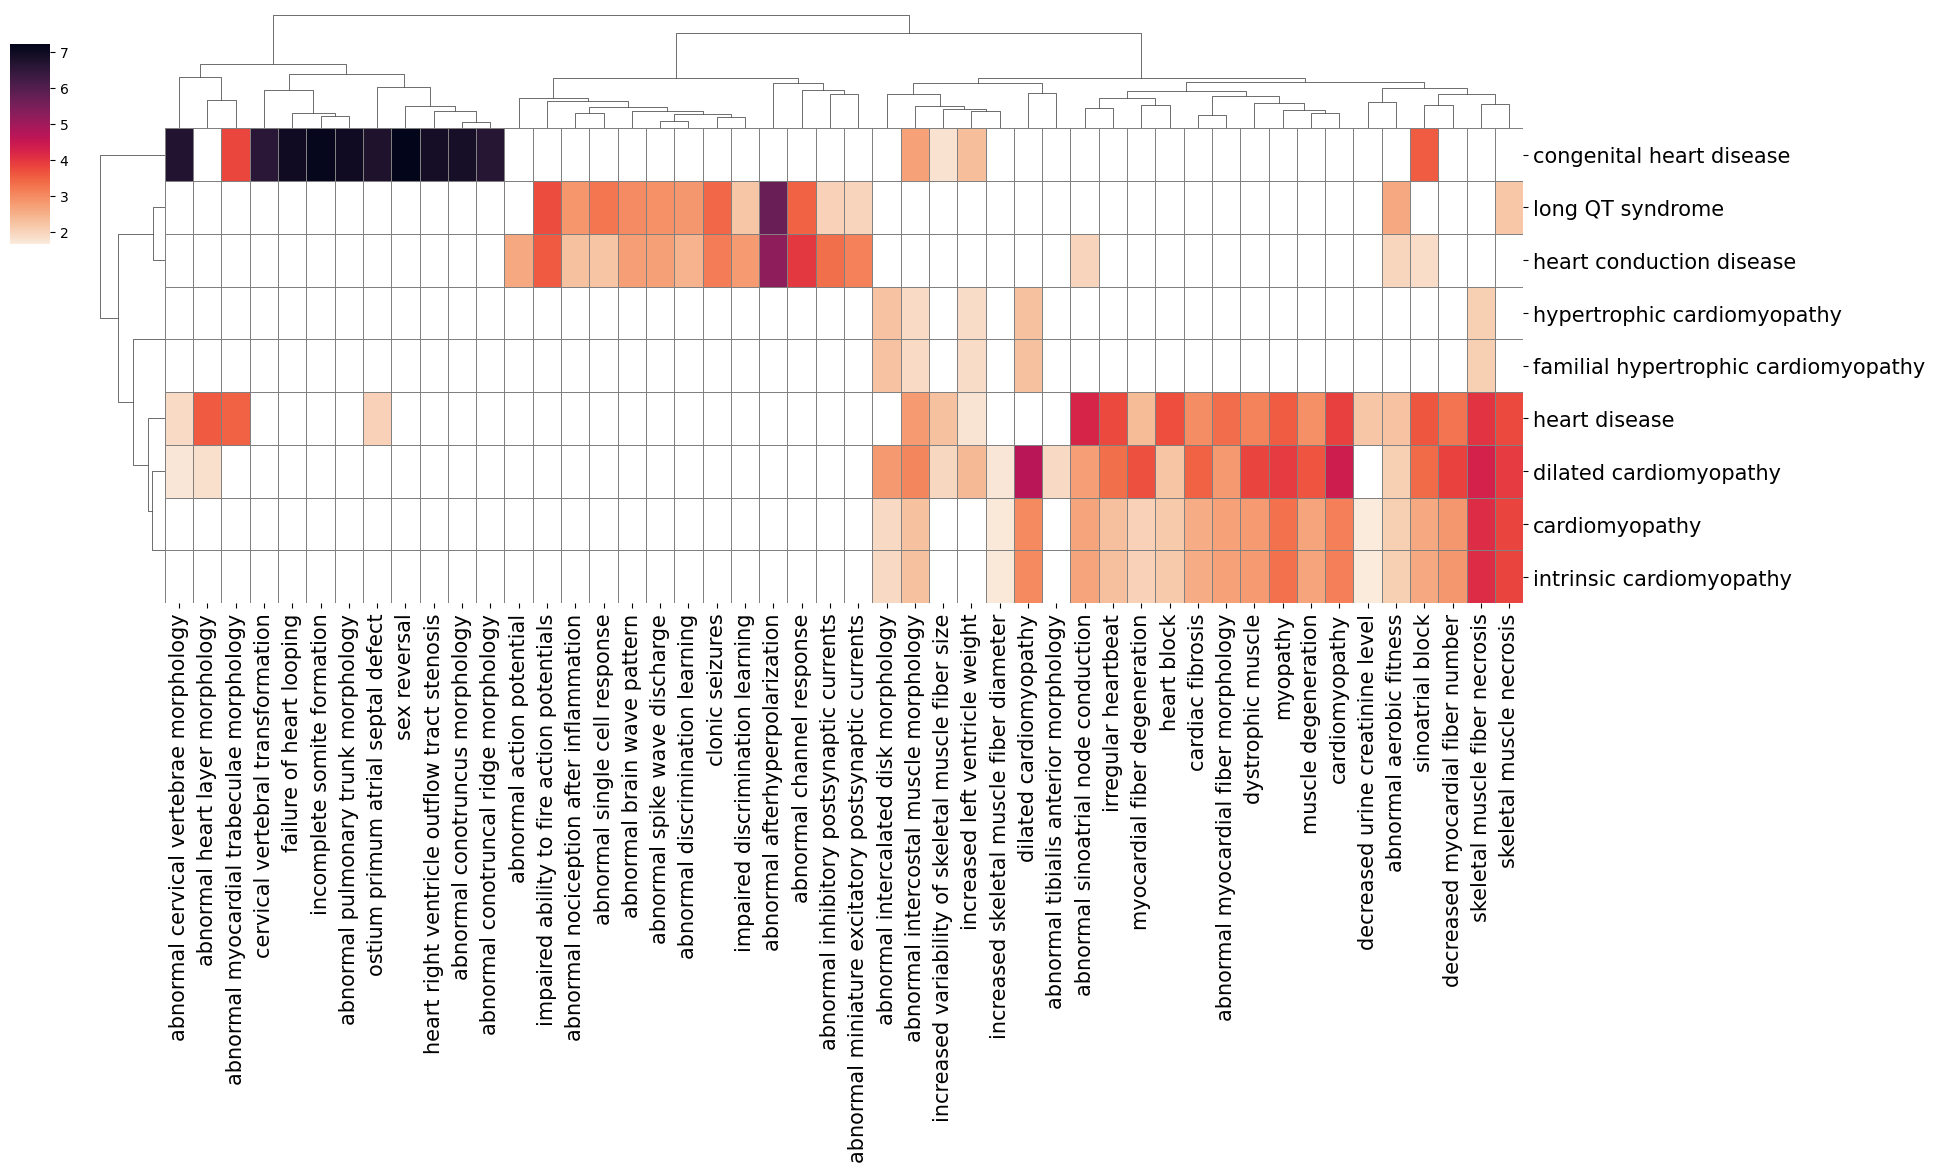

DOID:0050700 cardiomyopathy
(6, 29)
Bbox(x0=0.17743888888888892, y0=0.860675, x1=0.8566388888888891, y1=0.985)
Bbox(x0=0.17743888888888892, y0=0.860675, x1=0.8566388888888891, y1=0.985)


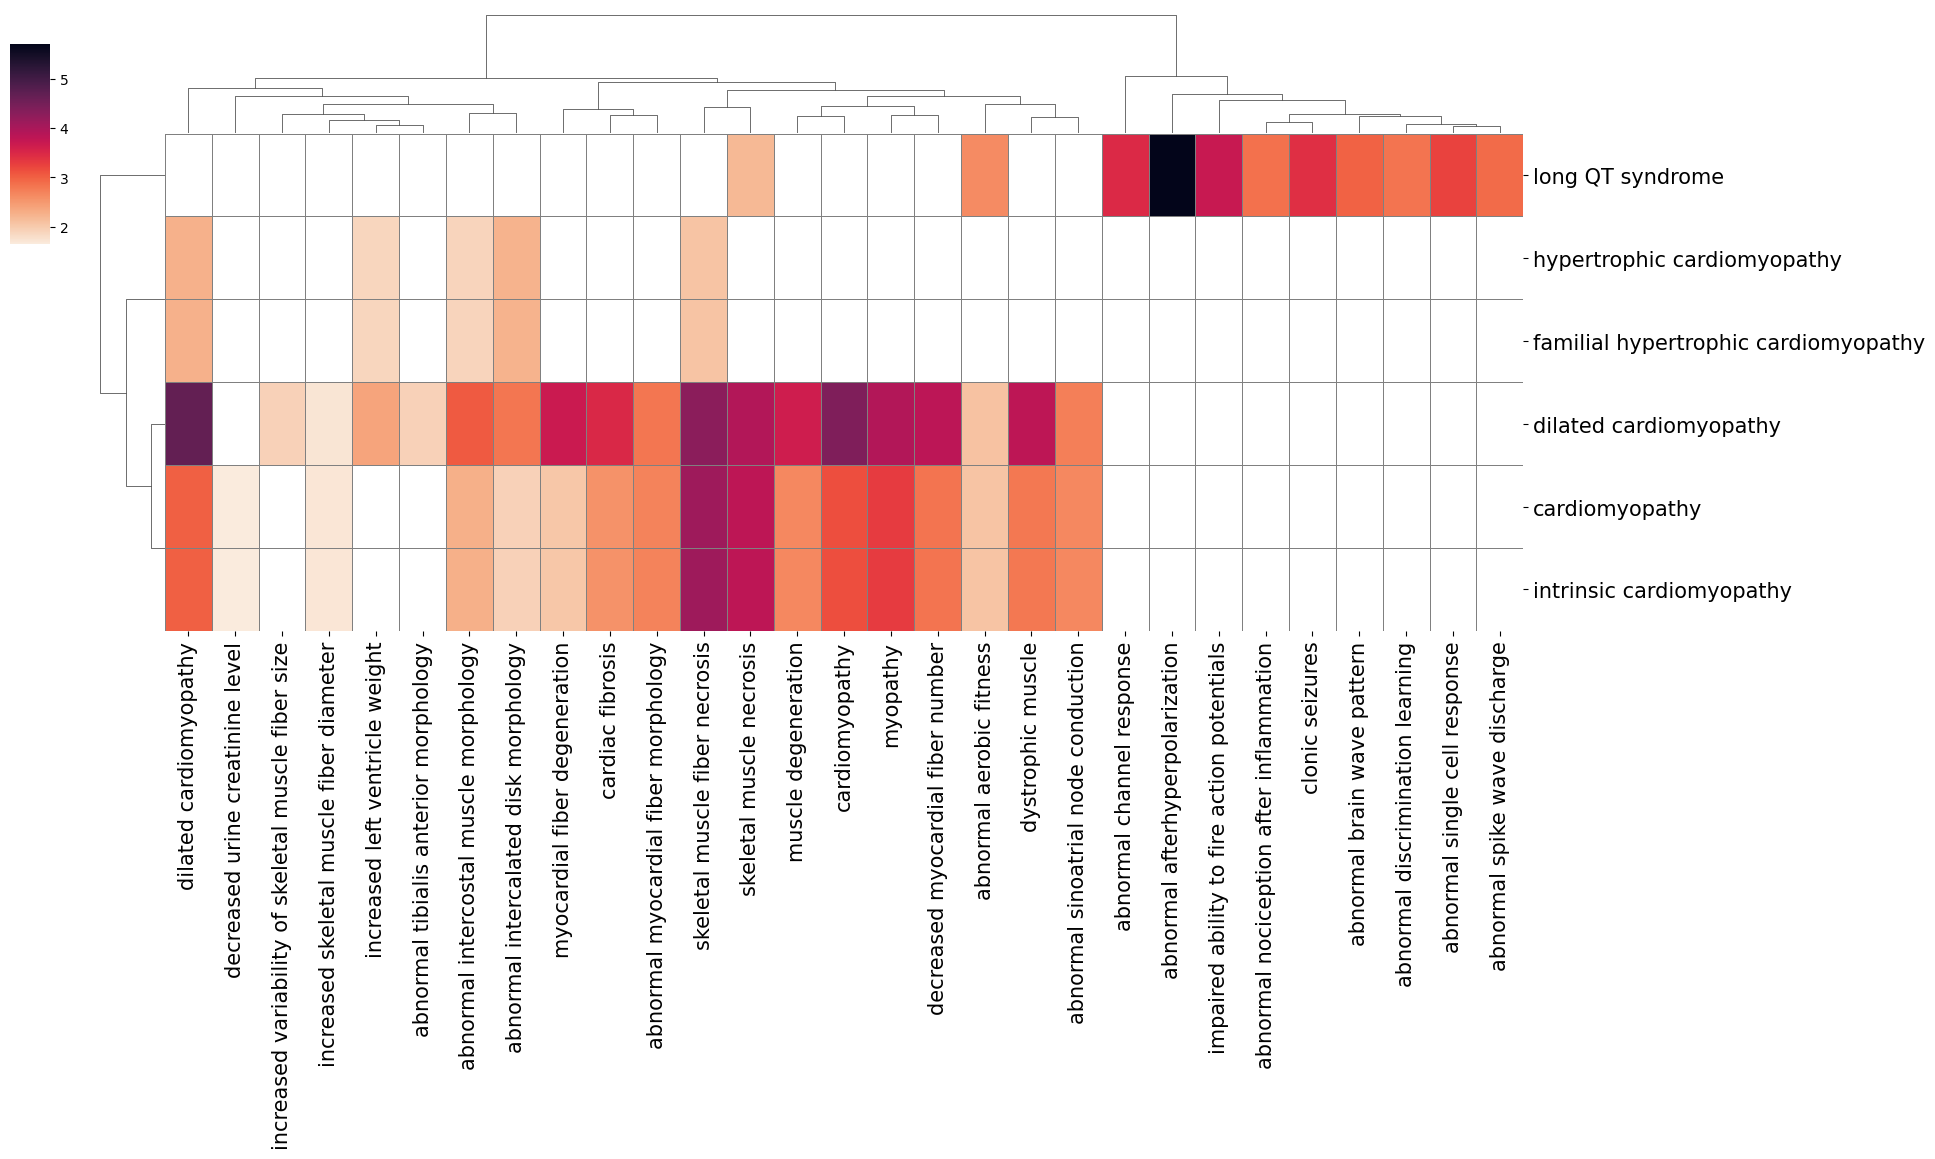

DOID:178 vascular disease
DOID:0050828 artery disease
DOID:229 female reproductive system disease
DOID:48 male reproductive system disease
DOID:0050161 lower respiratory tract disease
DOID:37 skin disease
(6, 38)
Bbox(x0=0.1743013888888889, y0=0.8644, x1=0.840951388888889, y1=0.985)
Bbox(x0=0.1743013888888889, y0=0.8644, x1=0.840951388888889, y1=0.985)


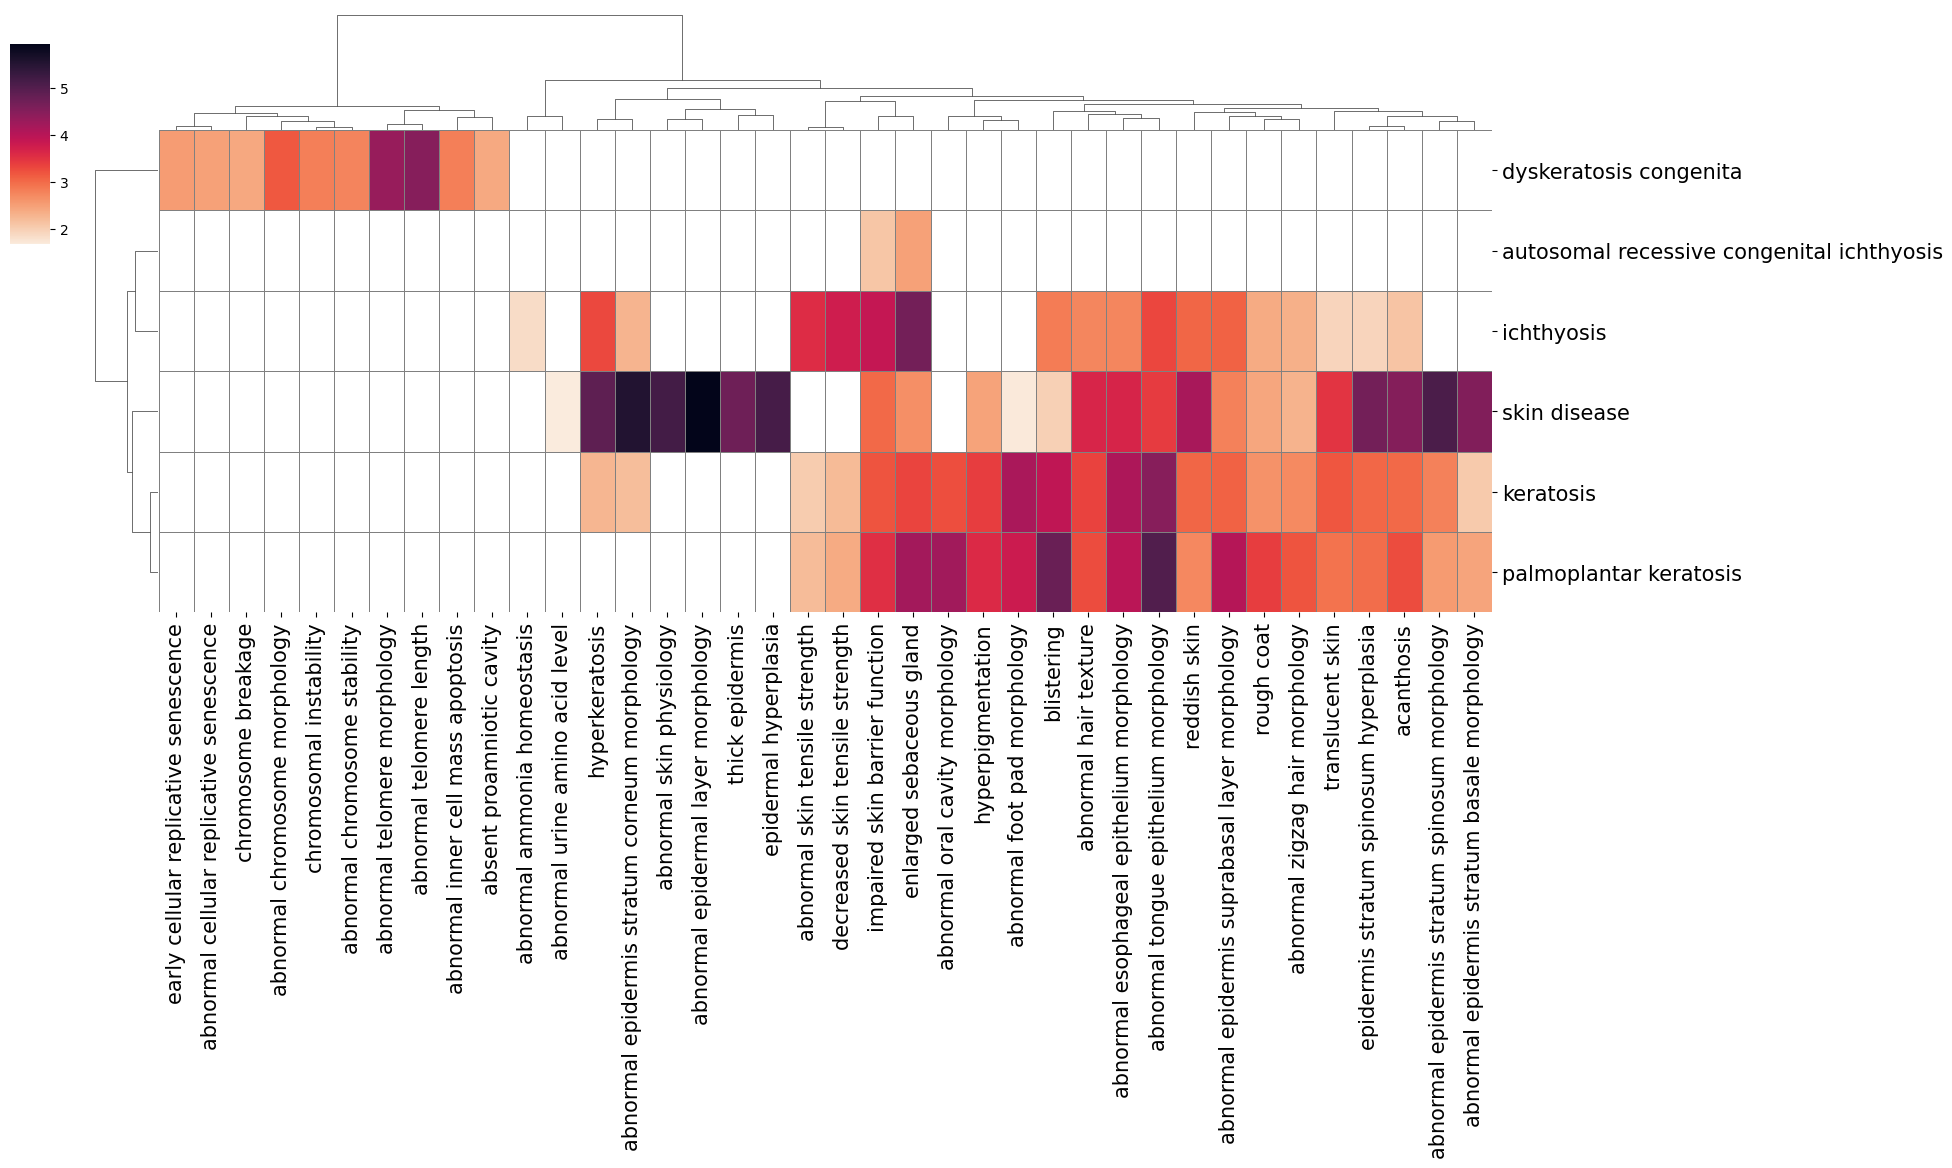

DOID:2723 dermatitis
DOID:421 hair disease
DOID:0060032 autoimmune disease of musculoskeletal system
DOID:0080000 muscular disease
DOID:423 myopathy
(12, 63)
Bbox(x0=0.16288888888888892, y0=0.883975, x1=0.783888888888889, y1=0.985)
Bbox(x0=0.16288888888888892, y0=0.883975, x1=0.783888888888889, y1=0.985)


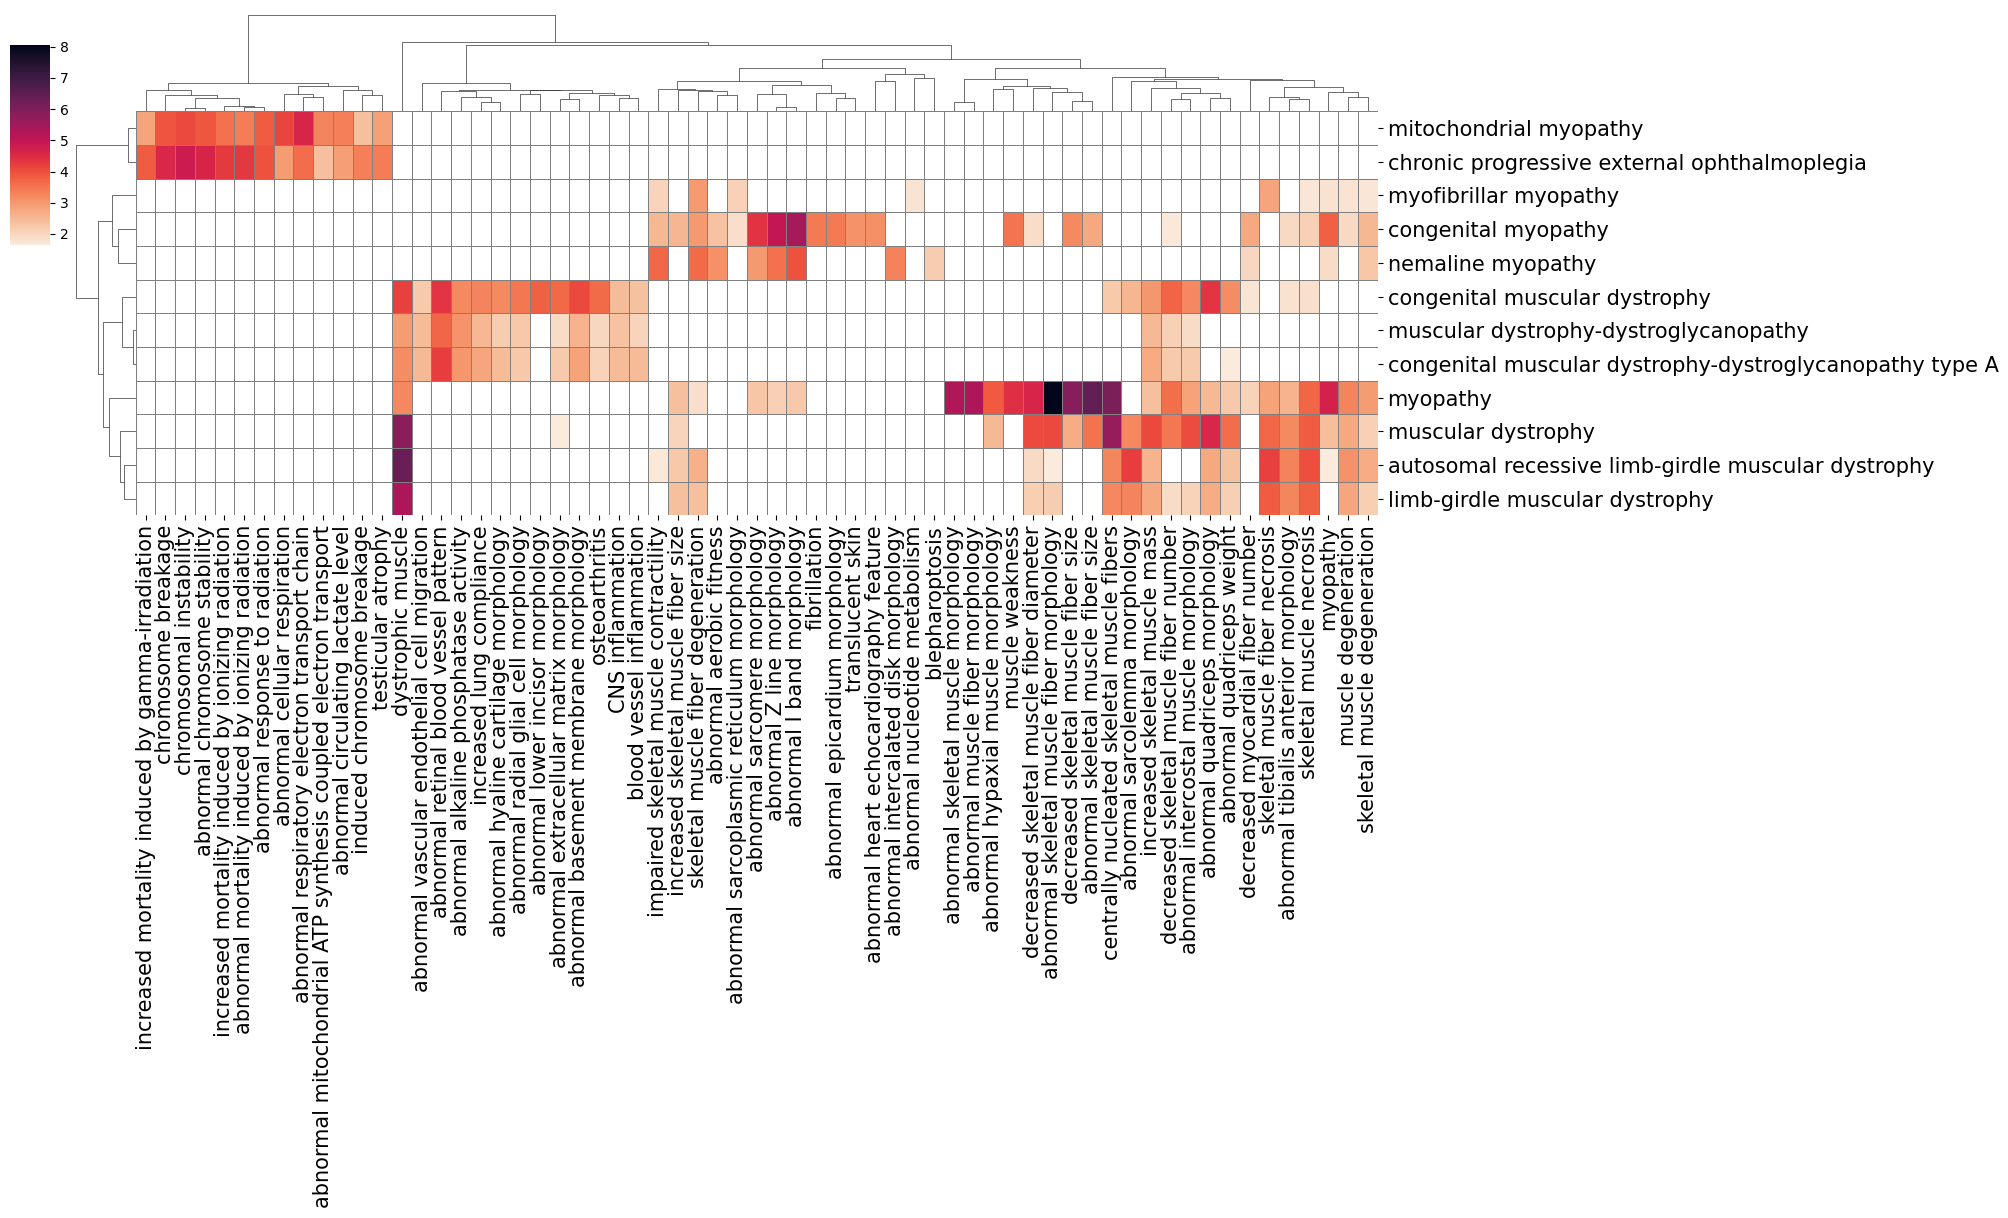

DOID:440 neuromuscular disease
DOID:10595 Charcot-Marie-Tooth disease
DOID:65 connective tissue disease
(8, 51)
Bbox(x0=0.18480138888888892, y0=0.859775, x1=0.893451388888889, y1=0.985)
Bbox(x0=0.18480138888888892, y0=0.859775, x1=0.893451388888889, y1=0.985)


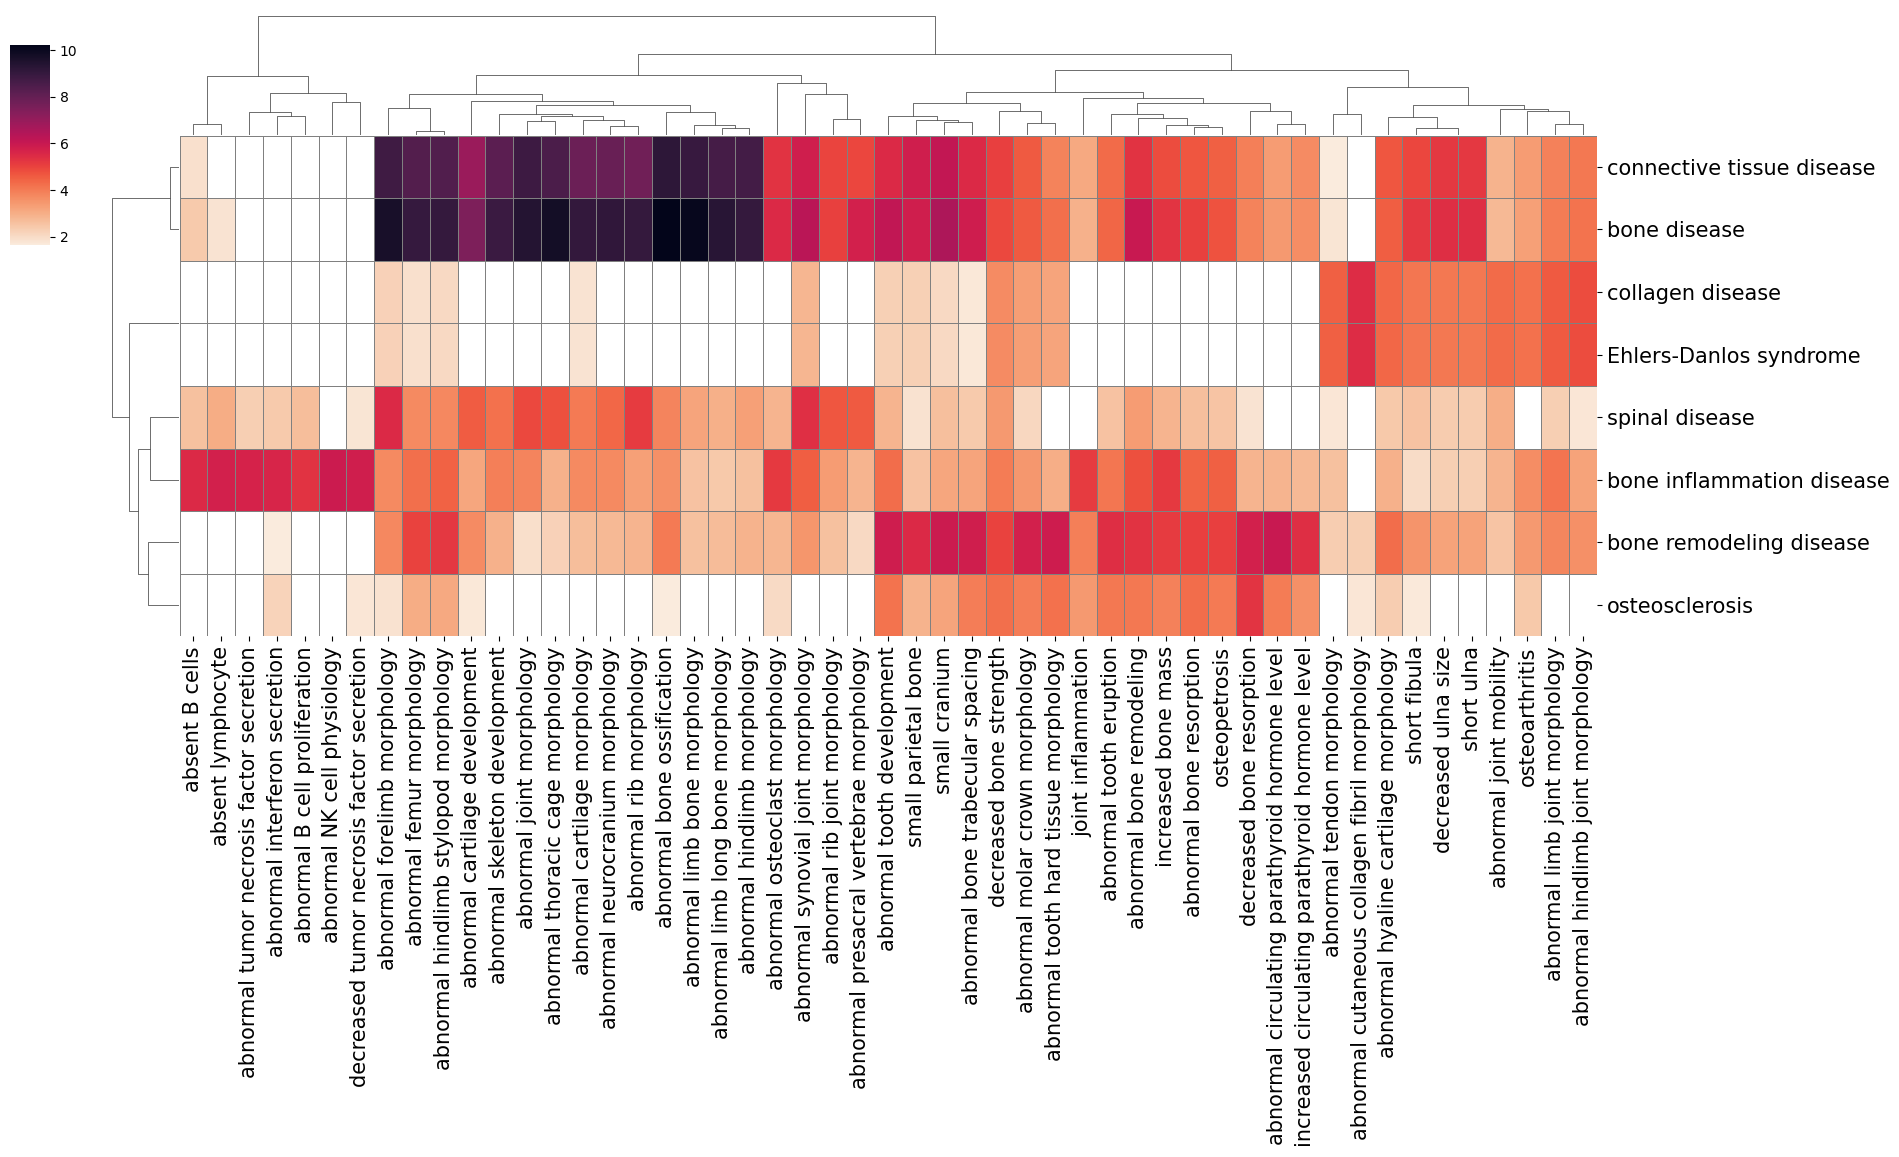

DOID:0080006 bone development disease
(7, 61)
Bbox(x0=0.17926388888888894, y0=0.8817999999999999, x1=0.8657638888888891, y1=0.985)
Bbox(x0=0.17926388888888894, y0=0.8817999999999999, x1=0.8657638888888891, y1=0.985)


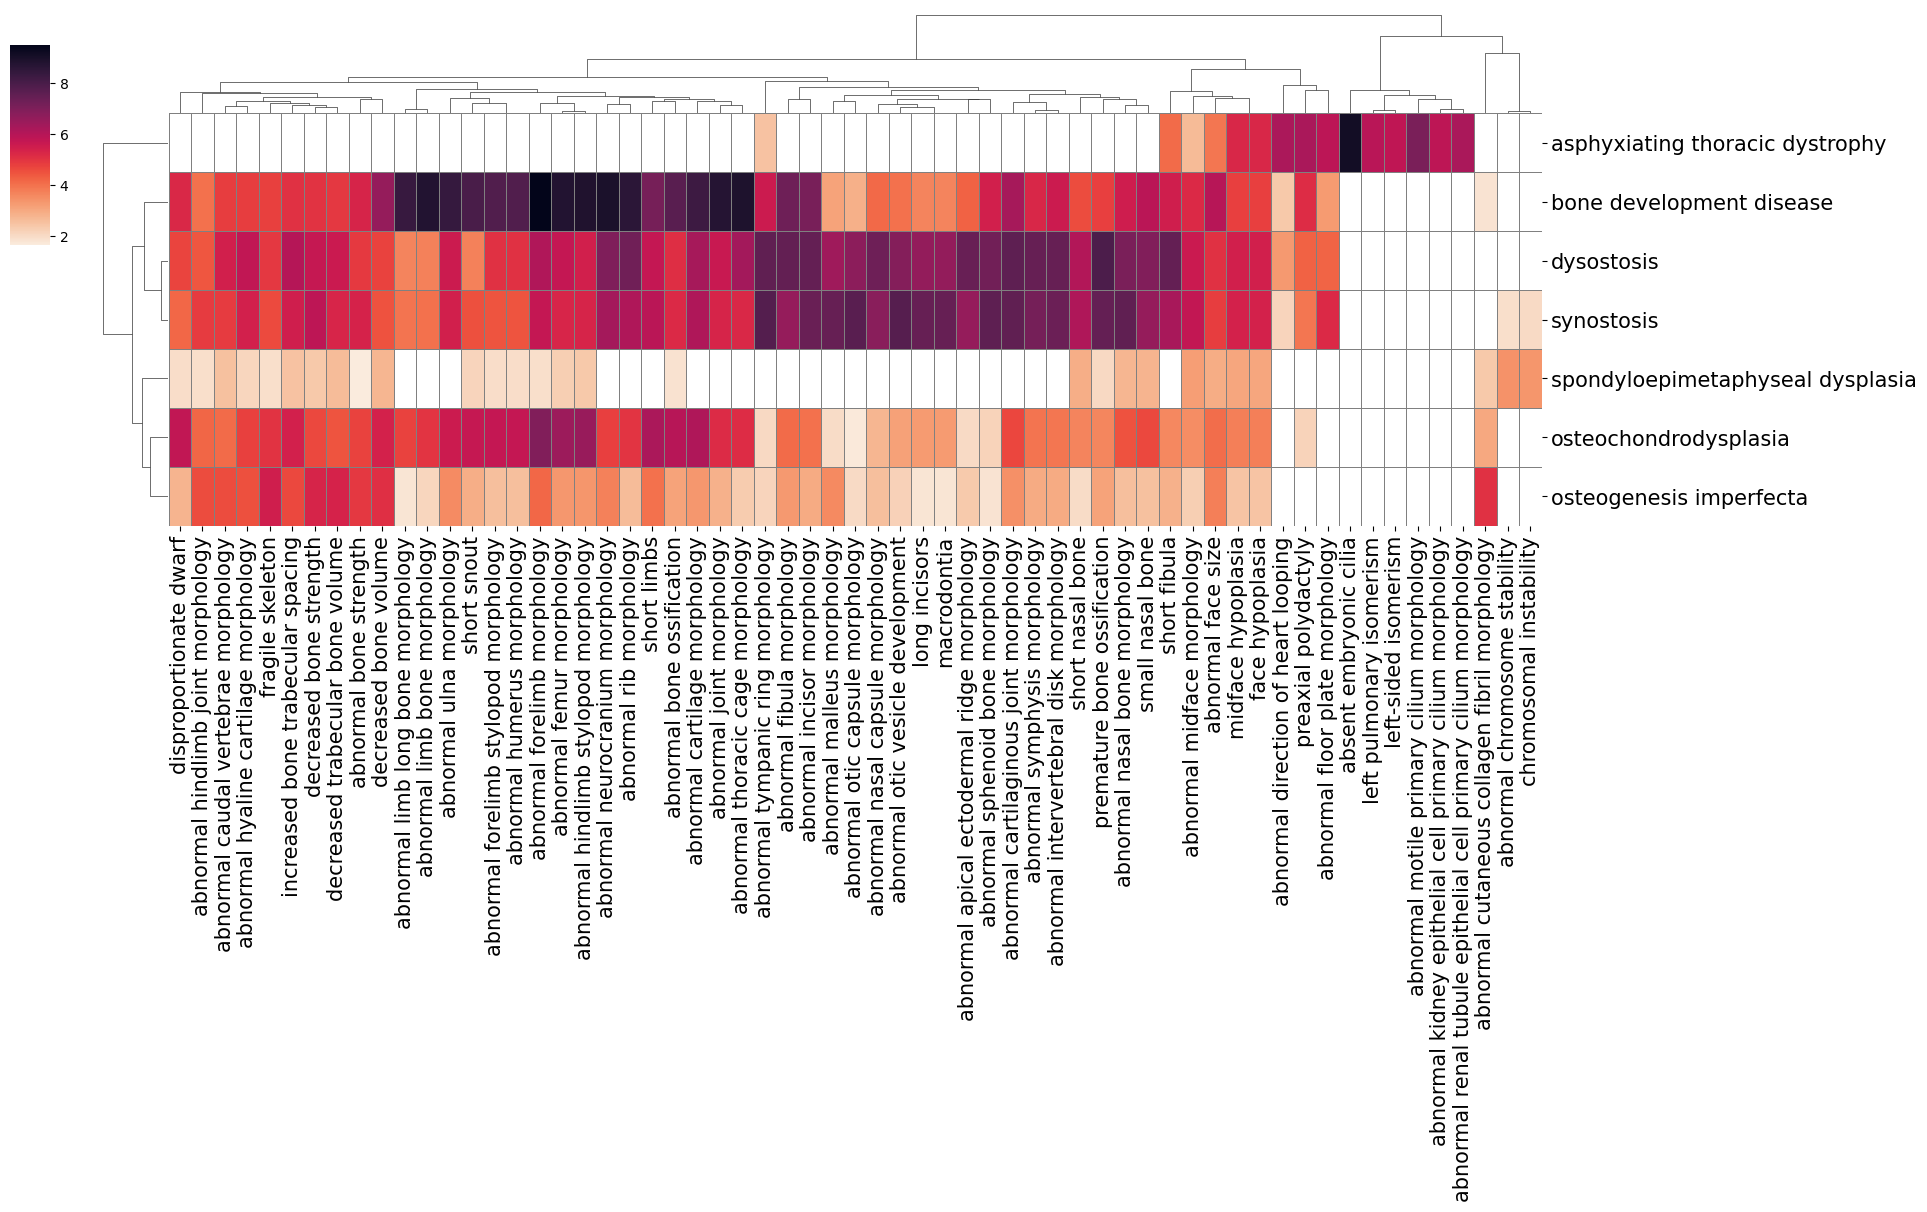

DOID:557 kidney disease
(7, 37)
Bbox(x0=0.18208888888888894, y0=0.8709, x1=0.879888888888889, y1=0.985)
Bbox(x0=0.18208888888888894, y0=0.8709, x1=0.879888888888889, y1=0.985)


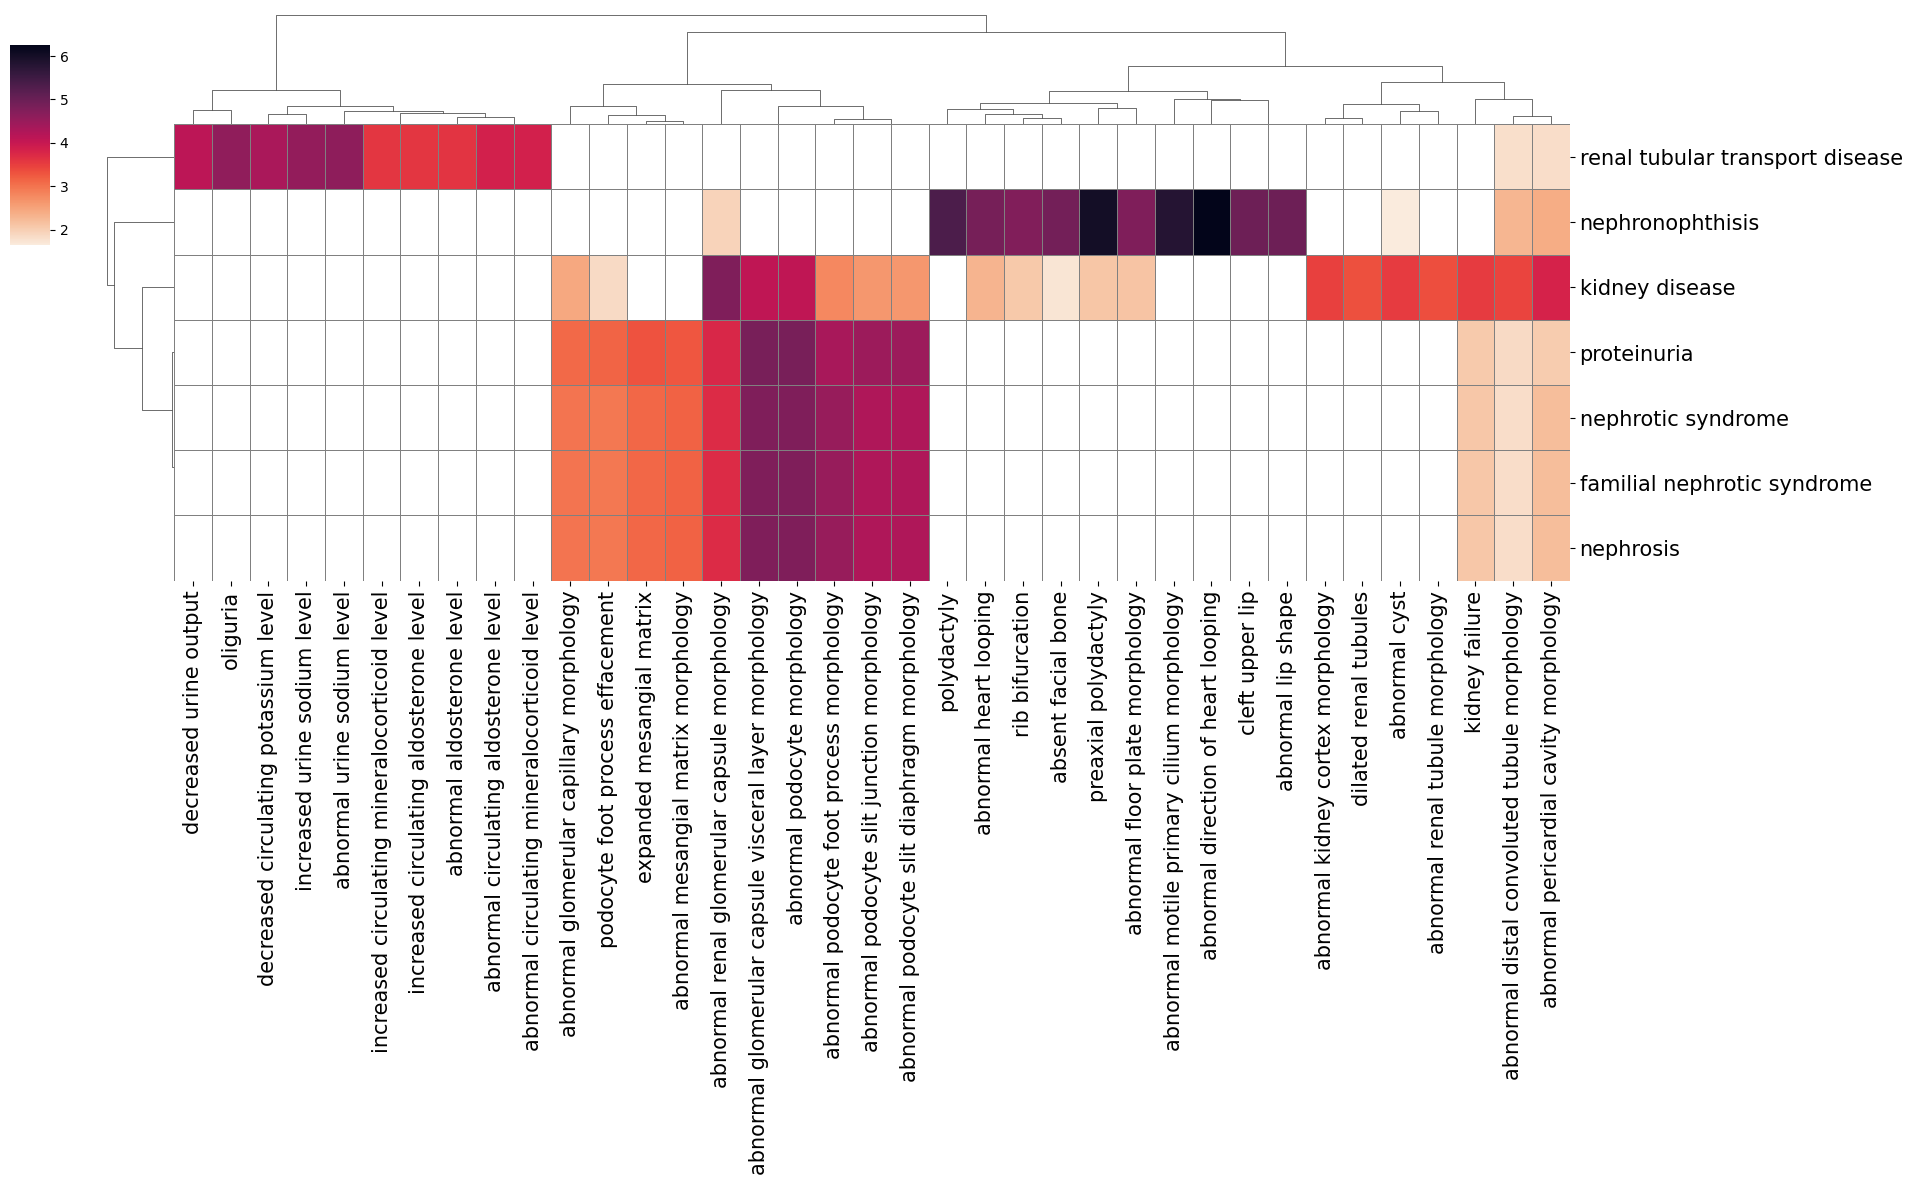

DOID:0060005 autoimmune disease of endocrine system
DOID:2277 gonadal disease
(7, 35)
Bbox(x0=0.1803138888888889, y0=0.8593, x1=0.871013888888889, y1=0.985)
Bbox(x0=0.1803138888888889, y0=0.8593, x1=0.871013888888889, y1=0.985)


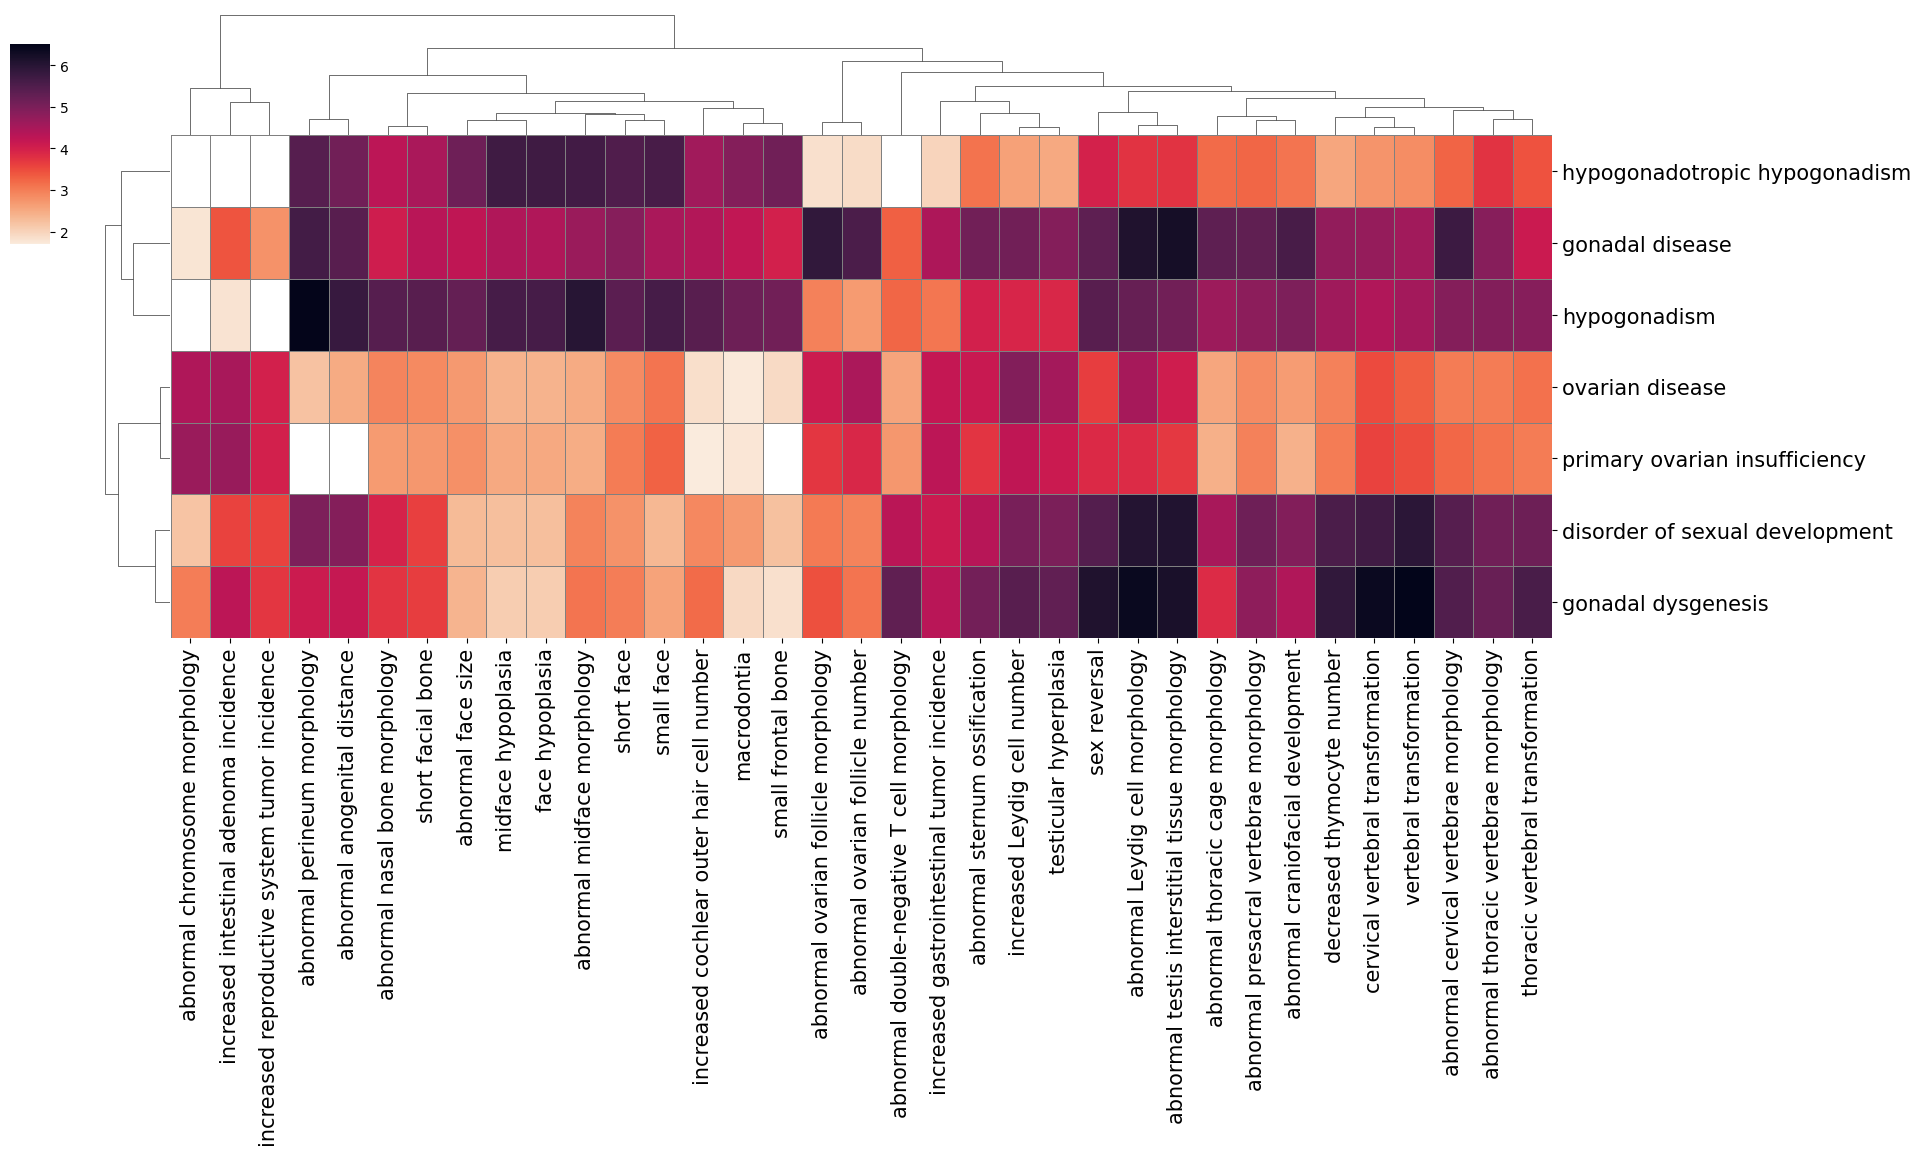

DOID:26 pancreas disease
DOID:50 thyroid gland disease
DOID:1459 hypothyroidism
DOID:53 pituitary gland disease
DOID:612 primary immunodeficiency disease
(12, 64)
Bbox(x0=0.17027638888888894, y0=0.862625, x1=0.820826388888889, y1=0.985)
Bbox(x0=0.17027638888888894, y0=0.862625, x1=0.820826388888889, y1=0.985)


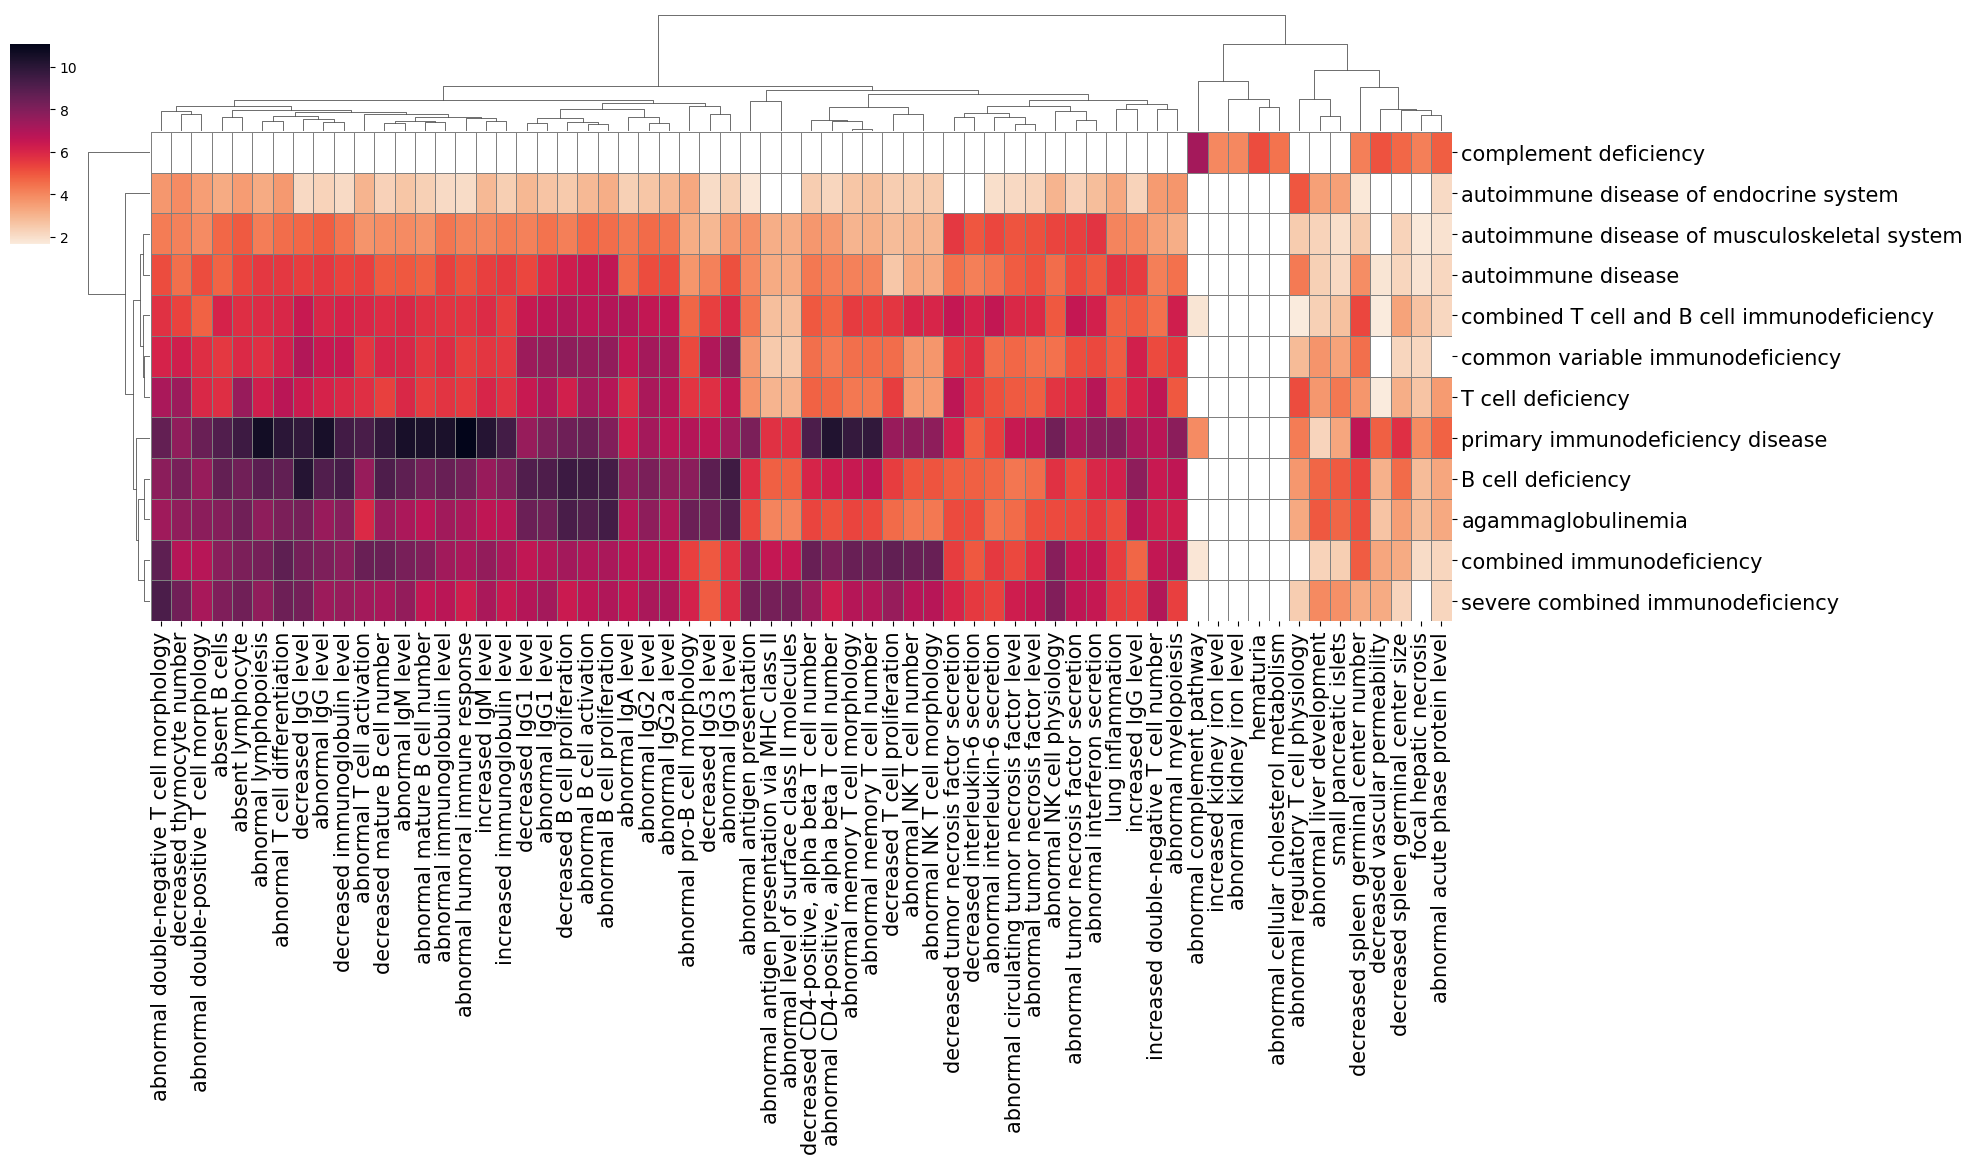

DOID:75 lymphatic system disease
DOID:1247 blood coagulation disease
DOID:2355 anemia
(8, 38)
Bbox(x0=0.18230138888888892, y0=0.868425, x1=0.880951388888889, y1=0.985)
Bbox(x0=0.18230138888888892, y0=0.868425, x1=0.880951388888889, y1=0.985)


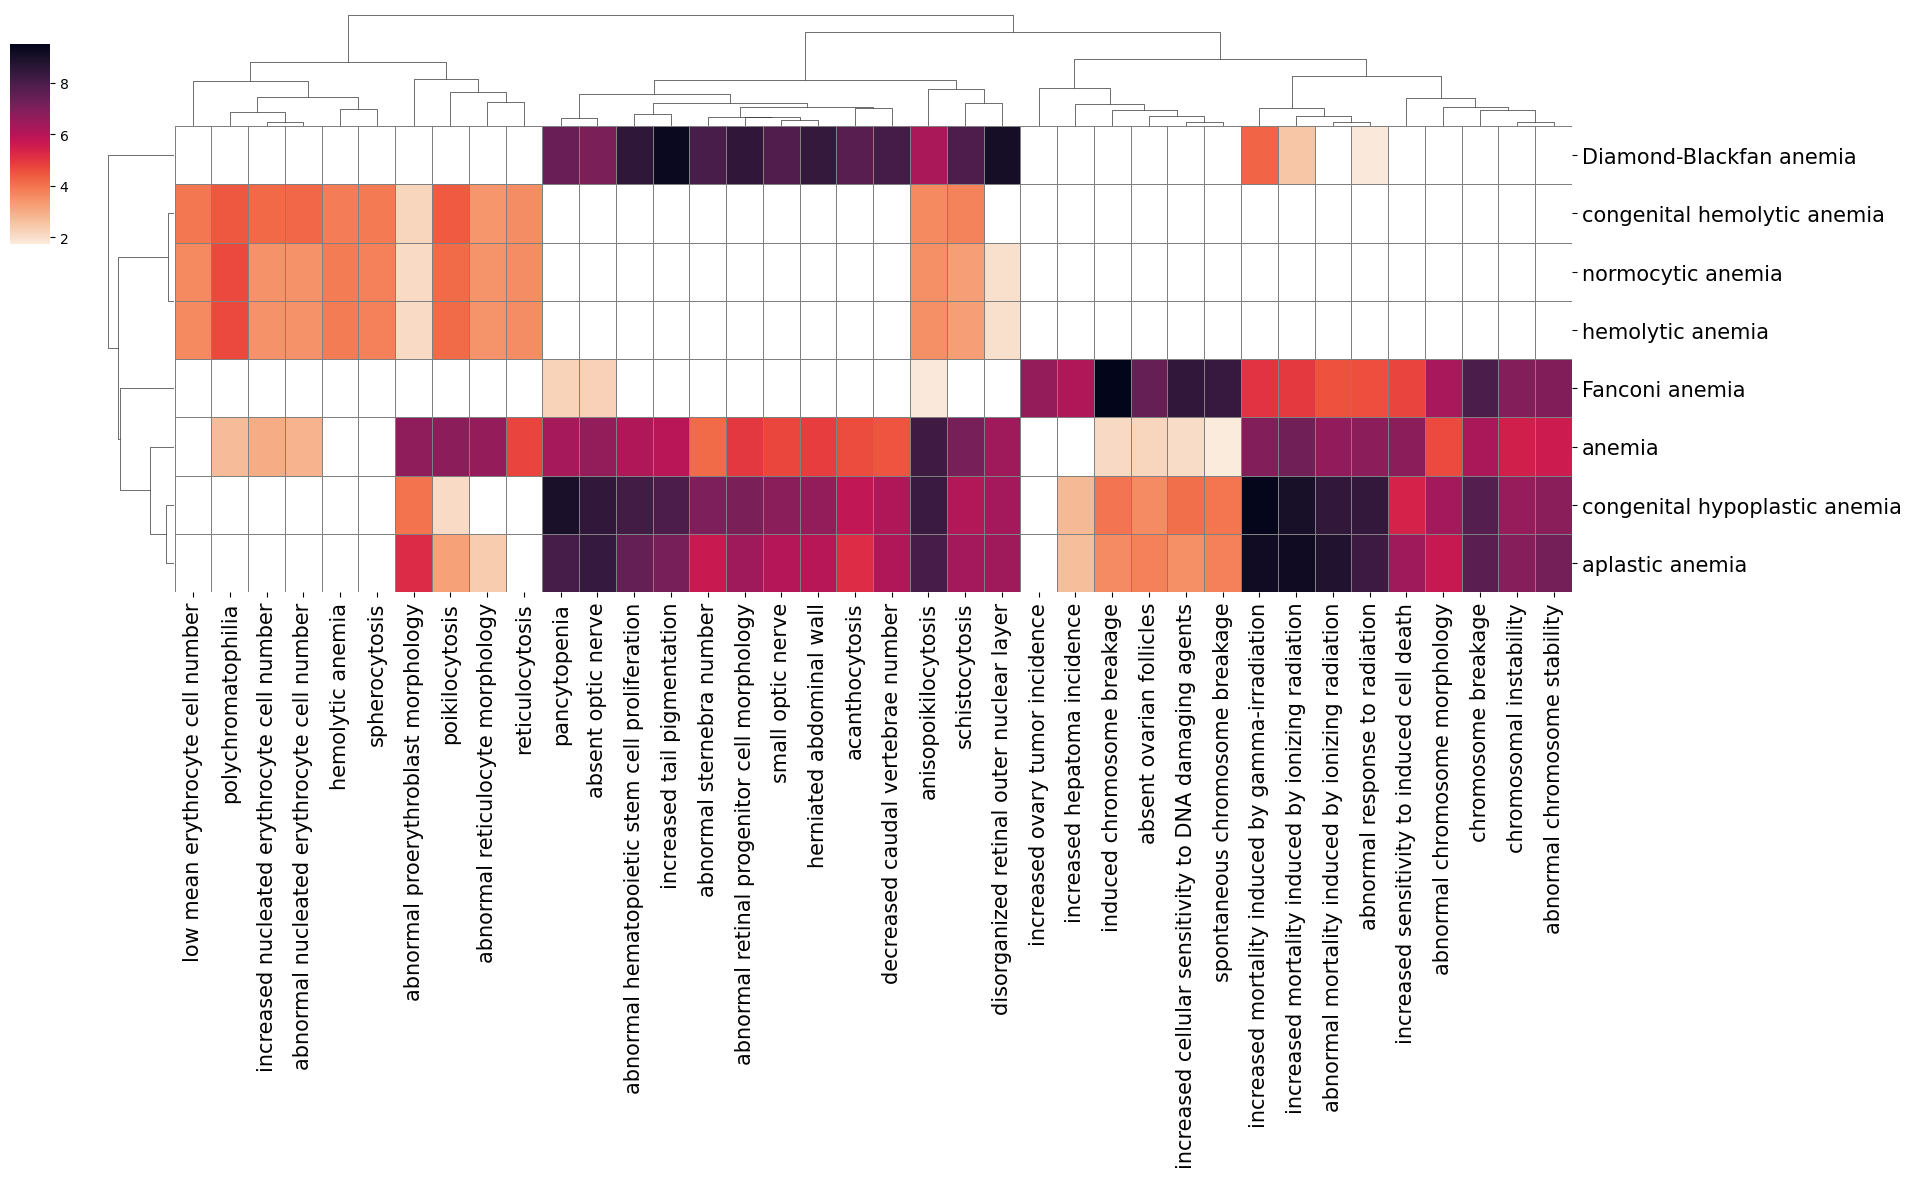

DOID:4961 bone marrow disease
DOID:9500 leukocyte disease
DOID:3118 hepatobiliary disease
DOID:403 mouth disease
(5, 17)
Bbox(x0=0.18563888888888894, y0=0.8521, x1=0.8976388888888891, y1=0.985)
Bbox(x0=0.18563888888888894, y0=0.8521, x1=0.8976388888888891, y1=0.985)


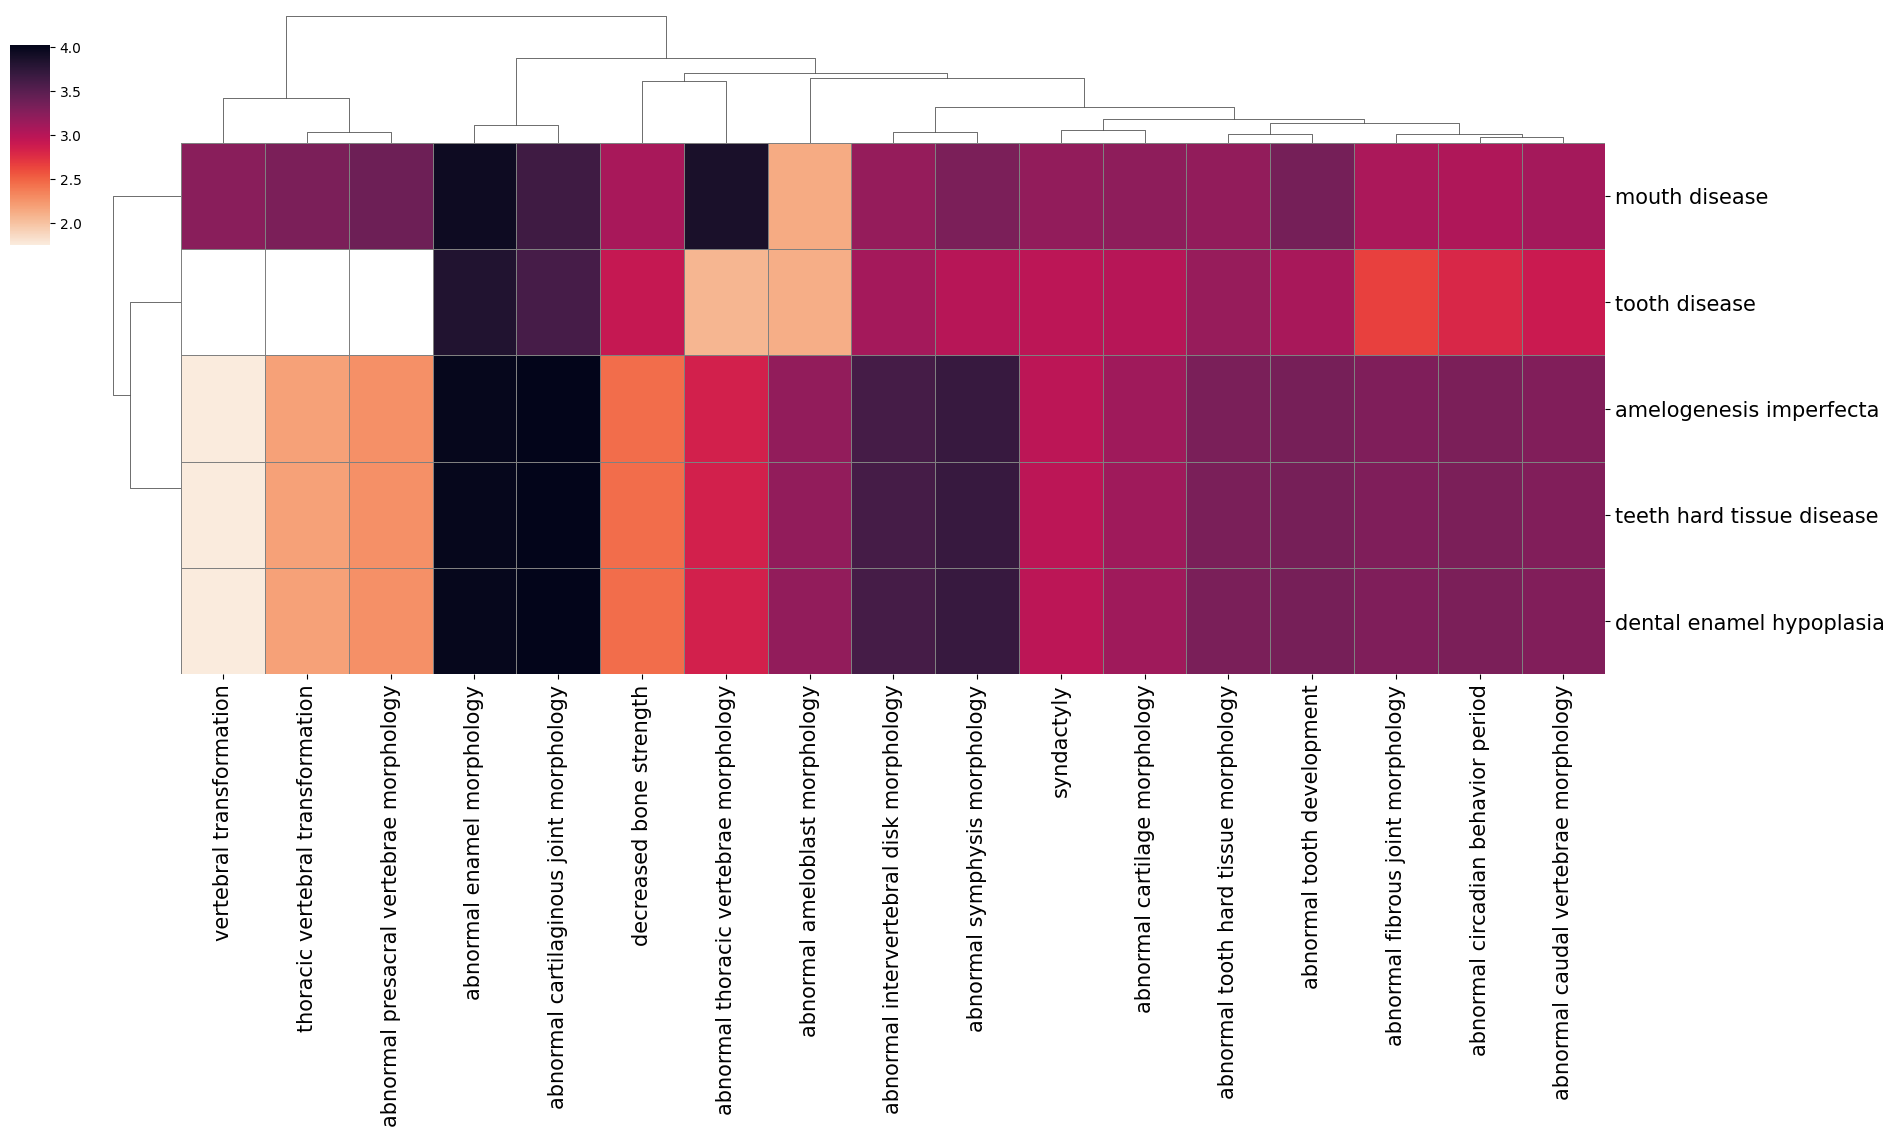

DOID:5295 intestinal disease
DOID:0050589 inflammatory bowel disease
DOID:76 stomach disease
DOID:0050155 sensory system disease
(11, 69)
Bbox(x0=0.1844013888888889, y0=0.86575, x1=0.891451388888889, y1=0.985)
Bbox(x0=0.1844013888888889, y0=0.86575, x1=0.891451388888889, y1=0.985)


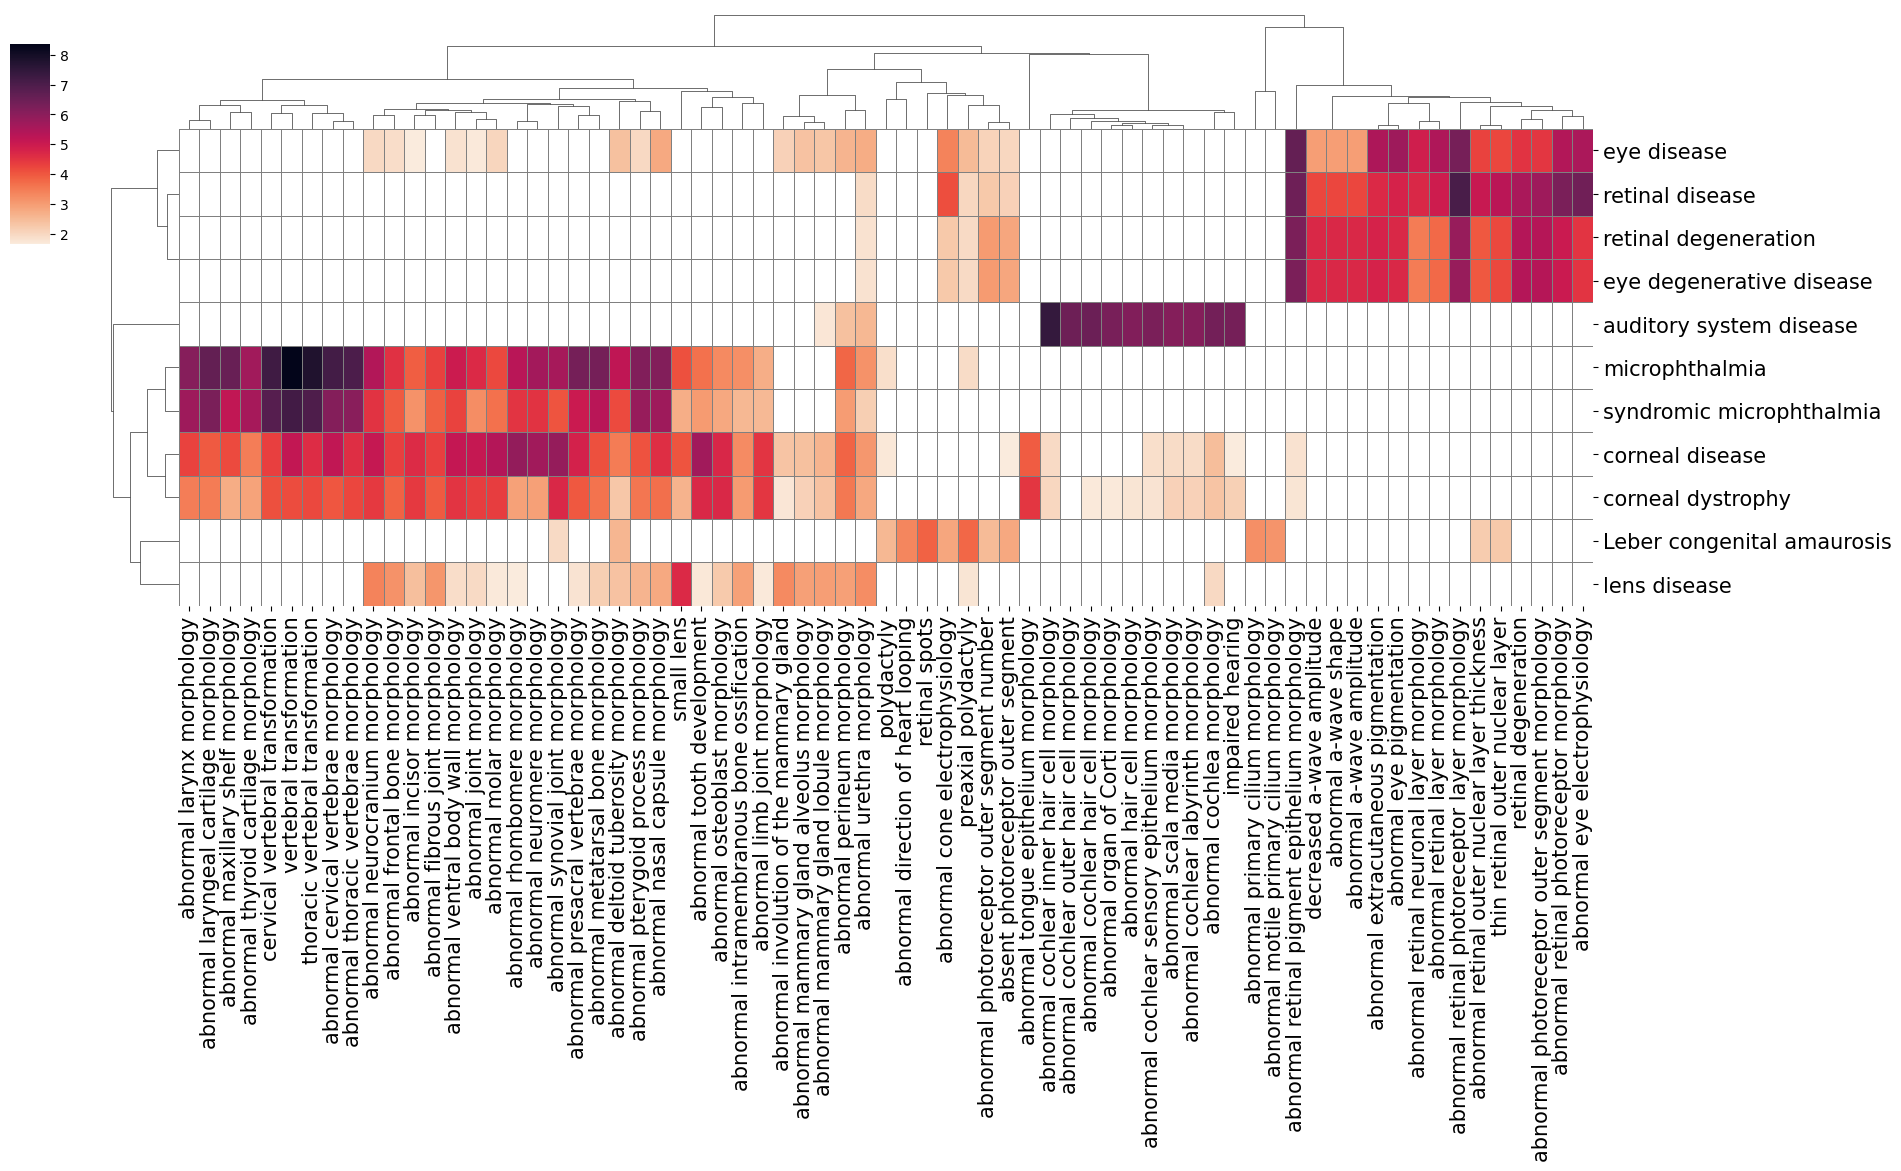

DOID:0050563 nonsyndromic deafness
DOID:10584 retinitis pigmentosa
DOID:4448 macular degeneration
DOID:331 central nervous system disease
(13, 83)
Bbox(x0=0.18092256906413534, y0=0.88785, x1=0.8736388888888889, y1=0.985)
Bbox(x0=0.18092256906413534, y0=0.88785, x1=0.8736388888888889, y1=0.985)


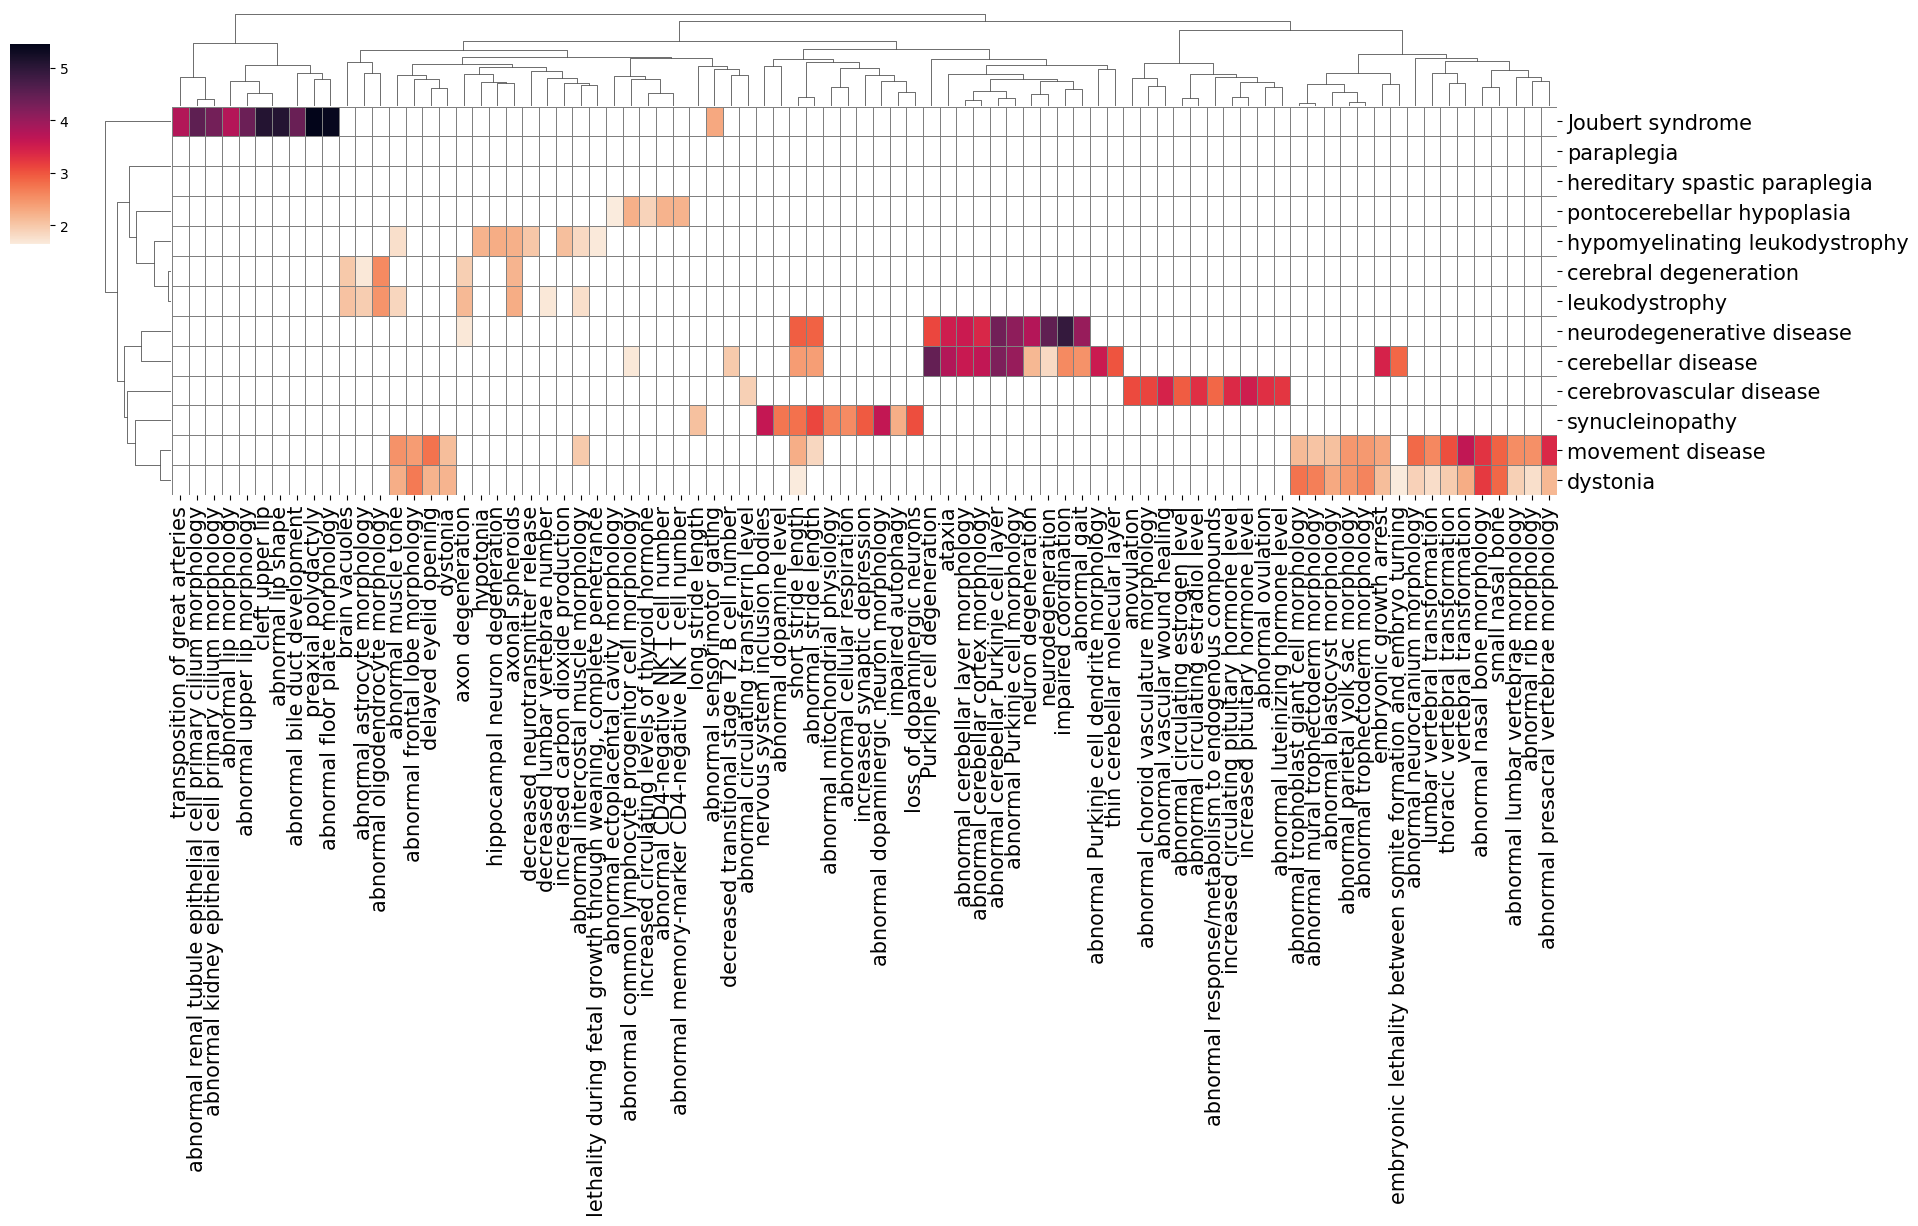

DOID:14330 Parkinson's disease
DOID:0050951 hereditary ataxia
DOID:231 motor neuron disease
DOID:1826 epilepsy
(7, 38)
Bbox(x0=0.17145138888888892, y0=0.883475, x1=0.826701388888889, y1=0.985)
Bbox(x0=0.17145138888888892, y0=0.883475, x1=0.826701388888889, y1=0.985)


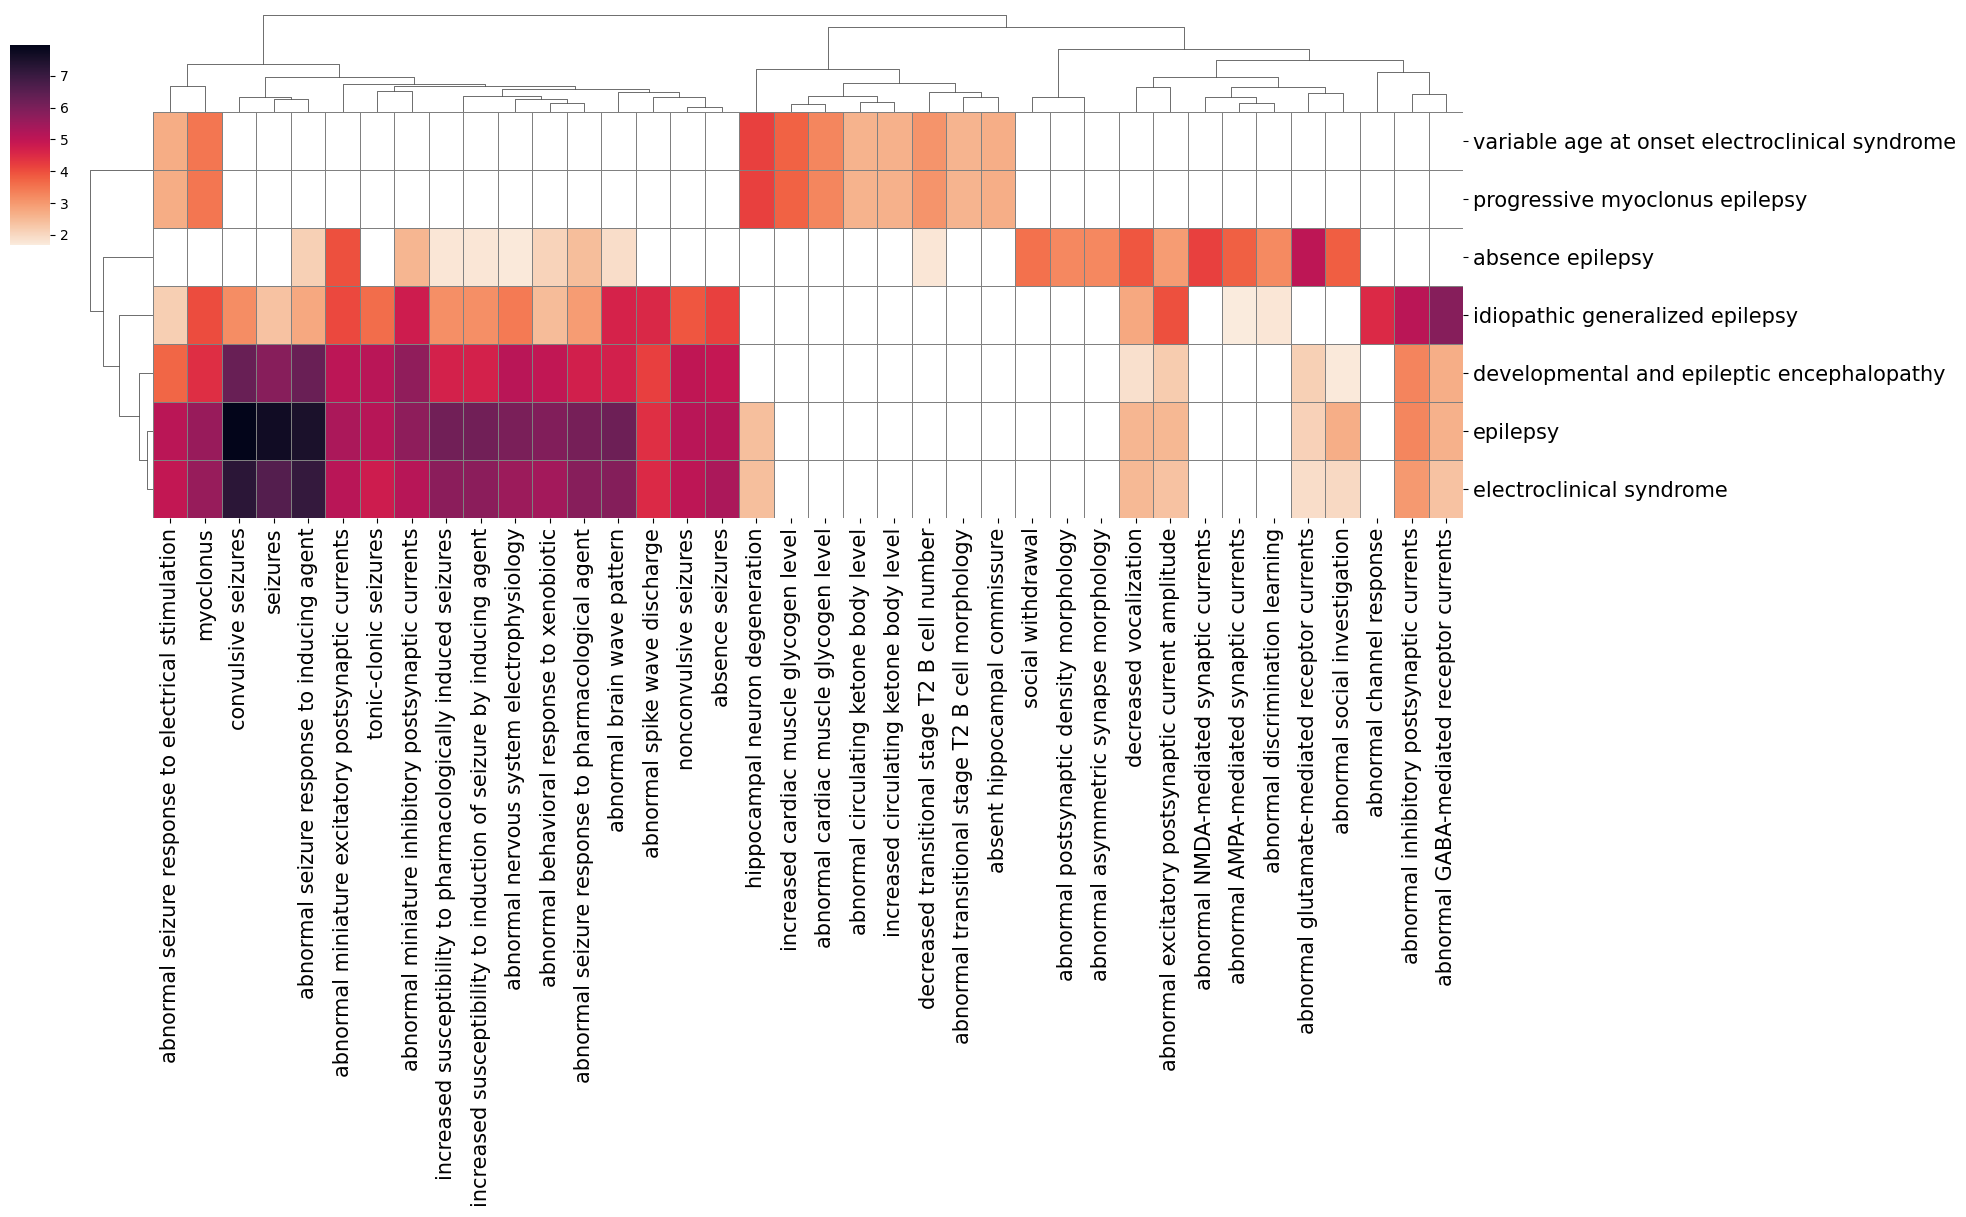

DOID:574 peripheral nervous system disease
(8, 44)
Bbox(x0=0.1793638888888889, y0=0.883975, x1=0.8662638888888889, y1=0.985)
Bbox(x0=0.1793638888888889, y0=0.883975, x1=0.8662638888888889, y1=0.985)


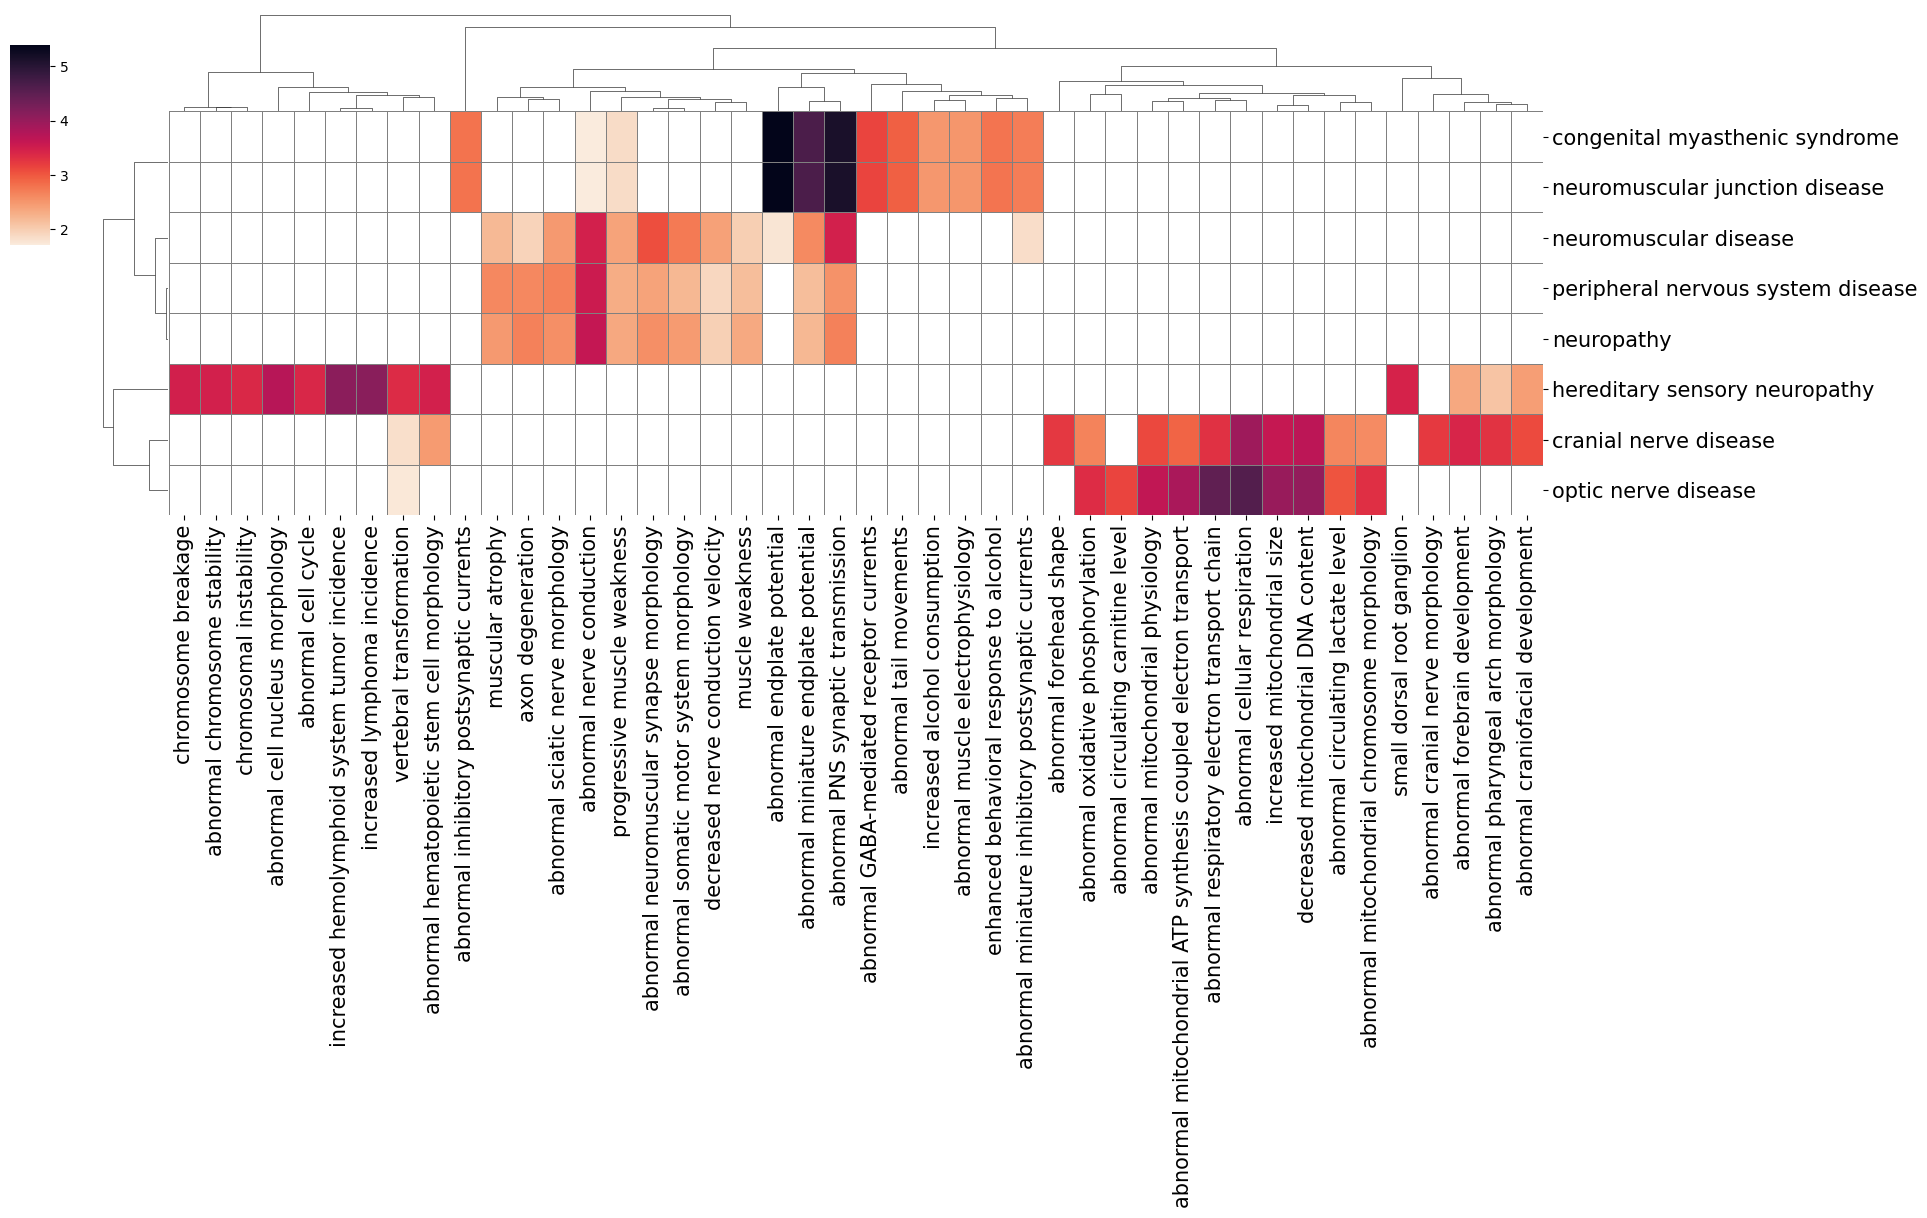

In [8]:
ordered_omim_slim_terms = [x for x in ordered_omim_nodes if x in omim_slim_terms]
for x in ordered_omim_slim_terms:
    print(x, omim_term2name[x])
    
    sub_matrix = helper.get_sub_matrix_single_selected(x, mouse_pheno, omim_slim2terms, 
                                                ordered_omim_nodes, ordered_mmu_nodes, k=10)
    sub_matrix = sub_matrix.loc[:,((sub_matrix>1.64).sum(axis=0) != 0)]
    

    if sub_matrix.shape[0]<5:
        continue
    if sub_matrix.shape[1]<5:
        continue
        
    print(sub_matrix.shape)

    a_fig = sns.clustermap(sub_matrix.values, 
                yticklabels=[omim_term2name[x] for x in sub_matrix.index], 
                xticklabels=[mmu_term2name[x] for x in sub_matrix.columns], 
                figsize=(20,10), linewidths=0.5, linecolor='grey', 
                mask=1-(sub_matrix.values>1.64), cmap='rocket_r',
                           cbar_pos=(0.1, .75, .02, .2))
    row = a_fig.ax_row_dendrogram.get_position()
    col = a_fig.ax_col_dendrogram.get_position()
    print(a_fig.ax_col_dendrogram.get_position())
    a_fig.ax_row_dendrogram.set_position([row.x0+row.width*0.8, row.y0, row.width*0.2, row.height])
    # a_fig.ax_col_dendrogram.set_position([col.x0, col.y0, col.width, 0.1])
    print(a_fig.ax_col_dendrogram.get_position())
    a_fig.ax_heatmap.set_xticklabels(a_fig.ax_heatmap.get_xmajorticklabels(), fontsize = 15)
    a_fig.ax_heatmap.set_yticklabels(a_fig.ax_heatmap.get_ymajorticklabels(), fontsize = 15)
    
    # plt.tight_layout()
    plt.show()
    plt.close()
    # break
    